# Configuration

## Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setting YOLOv8

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 3.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

import os

## Get Train/Validate/Test Data and Pretrained Model

In [ ]:
# data.zip
!gdown https://drive.google.com/uc?id=1uyw0REIAm71mkUASyPr359uBe7AIil9J
# model.pt
!gdown https://drive.google.com/uc?id=1tX-XlM-y1ih8F8c3M8ZC4_RnT_sXq3lz

Downloading...
From: https://drive.google.com/uc?id=1uyw0REIAm71mkUASyPr359uBe7AIil9J
To: /content/mini4research.zip
100% 670M/670M [00:15<00:00, 43.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tX-XlM-y1ih8F8c3M8ZC4_RnT_sXq3lz
To: /content/yolov8n.pt
100% 6.53M/6.53M [00:00<00:00, 28.3MB/s]


In [ ]:
!unzip mini4research.zip -d ./

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./content/splited_data/train/images/Japan_009219.jpg  
  inflating: ./content/splited_data/train/images/1478900817135358885.jpg  
  inflating: ./content/splited_data/train/images/1478898294319049548.jpg  
  inflating: ./content/splited_data/train/images/1479503260796107211.jpg  
  inflating: ./content/splited_data/train/images/1479506043967880169.jpg  
  inflating: ./content/splited_data/train/images/1478901229605748565.jpg  
  inflating: ./content/splited_data/train/images/1479506041484493594.jpg  
  inflating: ./content/splited_data/train/images/1478896008589450439.jpg  
  inflating: ./content/splited_data/train/images/1478901265598057470.jpg  
  inflating: ./content/splited_data/train/images/1478895710947352874.jpg  
  inflating: ./content/splited_data/train/images/1479502803266000351.jpg  
  inflating: ./content/splited_data/train/images/India_000061.jpg  
  inflating: ./content/splited_data/train/images/1478901192472959047.jpg  
  i

In [ ]:
!mkdir datasets
!mv content/splited_data/data.yaml /content/content/
!mv content datasets/

# Training

## Test Hyperparameters

In [ ]:
# 예비용 돌리지 마세요
# Define hyperparameters to tune
learning_rates = [0.0001, 0.001, 0.01]
batch_sizes = [32, 64, 128]
optimizers = ['Adam', 'SGD']
#activation_functions = ['leaky_relu', 'gelu', 'mish']
#loss_functions = ['binary_crossentropy', 'iou_loss' 'focal_loss']

regularizations = [0.0, 0.25, 0.5]

image_sizes = [192, 416, 640]


# Set up the search space
search_space = { 'learning_rate': learning_rates,
                'batch_size': batch_sizes,
                'optimizer': optimizers,
                 'regularization': regularizations,
                 'image_size': image_sizes,
                # 'activation_function': activation_functions,
                # 'loss_function': loss_functions,
                 }

# Create parameter grid
parameter_grid = ParameterGrid(search_space)
storage_path = /content/drive/MyDrive/LGInternship
count = 0

# Train and evaluate the model for each combination of hyperparameters
for parameters in parameter_grid:
    model.YOLO("yolo8n.pt")
    learning_rate = parameters['learning_rate']
    batch_size = parameters['batch_size']
    optimizer = parameters['optimizer']
    # num_epochs = parameters['epochs']
    regularization = parameters['regularization']
    imgsize = parameters['image_size']
    experiment_path = f"{storage_path}/{count}"

    # model.tune(train_args = parameters)
    model.train(data='/data/content/splited_data/data.yaml', epochs = 50, batch= batch_size, imgsz=imgsize, optimizer = optimizer, dropout=regularization, project = experiment_path)

    print(f"Loading results from {experiment_path}...")
    count += 1

Divide upper code because of colab GPU computing unit

In [ ]:
# 1st
parameter_grid = [{'batch_size': 32, 'learning_rate': 0.0001, 'optimizer': 'Adam'},
 {'batch_size': 32, 'learning_rate': 0.0001, 'optimizer': 'SGD'}, # Clear
  {'batch_size': 32, 'learning_rate': 0.001, 'optimizer': 'Adam'},
   {'batch_size': 32, 'learning_rate': 0.001, 'optimizer': 'SGD'},
    {'batch_size': 32, 'learning_rate': 0.01, 'optimizer': 'Adam'}]

storage_path = './drive/MyDrive/LGInternship'

# Train and evaluate the model for each combination of hyperparameters
for parameters in parameter_grid:
    model = YOLO("/content/yolov8n.pt")
    learning_rate = parameters['learning_rate']
    batch_size = parameters['batch_size']
    optimizer = parameters['optimizer']
    experiment_path = f"{storage_path}/bs_{batch_size}_lr_{learning_rate}_optim_{optimizer}"


    # model.tune(train_args = parameters)
    model.train(data='/content/datasets/content/data.yaml', epochs = 50, batch= batch_size, optimizer = optimizer, lr0 = learning_rate, project = experiment_path, save = True)

    print(f"Loading results from {experiment_path}...")

Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/LGInternship/bs_32_lr_0.0001_optim_SGD/train/weights/last.pt, data=/content/datasets/content/data.yaml, epochs=50, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=./drive/MyDrive/LGInternship/bs_32_lr_0.0001_optim_SGD, name=None, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic

Loading results from ./drive/MyDrive/LGInternship/bs_32_lr_0.0001_optim_SGD...


In [ ]:
# 2nd
parameter_grid = [{'batch_size': 32, 'learning_rate': 0.01, 'optimizer': 'SGD'},
{'batch_size': 64, 'learning_rate': 0.0001, 'optimizer': 'Adam'},
{'batch_size': 64, 'learning_rate': 0.0001, 'optimizer': 'SGD'},
{'batch_size': 64, 'learning_rate': 0.001, 'optimizer': 'Adam'},
{'batch_size': 64, 'learning_rate': 0.001, 'optimizer': 'SGD'}]

storage_path = './drive/MyDrive/LGInternship'

# Train and evaluate the model for each combination of hyperparameters
for parameters in parameter_grid:
    model = YOLO("/content/yolov8n.pt")
    learning_rate = parameters['learning_rate']
    batch_size = parameters['batch_size']
    optimizer = parameters['optimizer']
    experiment_path = f"{storage_path}/bs_{batch_size}_lr_{learning_rate}_optim_{optimizer}"


    # model.tune(train_args = parameters)
    model.train(data='/content/datasets/content/data.yaml', epochs = 50, batch= batch_size, optimizer = optimizer, lr0 = learning_rate, project = experiment_path, save = True)

    print(f"Loading results from {experiment_path}...")

Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/datasets/content/data.yaml, epochs=50, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=./drive/MyDrive/LGInternship/bs_64_lr_0.001_optim_Adam, name=None, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, forma

Loading results from ./drive/MyDrive/LGInternship/bs_64_lr_0.001_optim_Adam...


Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/datasets/content/data.yaml, epochs=50, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=./drive/MyDrive/LGInternship/bs_64_lr_0.001_optim_SGD, name=None, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=

Loading results from ./drive/MyDrive/LGInternship/bs_64_lr_0.001_optim_SGD...


In [ ]:
# 3rd
parameter_grid = [{'batch_size': 64, 'learning_rate': 0.01, 'optimizer': 'Adam'},
{'batch_size': 64, 'learning_rate': 0.01, 'optimizer': 'SGD'}, # Able to run
{'batch_size': 128, 'learning_rate': 0.0001, 'optimizer': 'Adam'}, # Unable to run due to GPU memory excess
{'batch_size': 128, 'learning_rate': 0.0001, 'optimizer': 'SGD'}]

storage_path = './drive/MyDrive/DL/YOLOv8'
count = 0

# Train and evaluate the model for each combination of hyperparameters
for parameters in parameter_grid:
    model = YOLO("/content/yolov8n.pt")
    learning_rate = parameters['learning_rate']
    batch_size = parameters['batch_size']
    optimizer = parameters['optimizer']
    experiment_path = f"{storage_path}/bs_{batch_size}_lr_{learning_rate}_optim_{optimizer}"


    # model.tune(train_args = parameters)
    model.train(data='/content/datasets/content/data.yaml', epochs = 50, batch= batch_size, optimizer = optimizer, lr0 = learning_rate, project = experiment_path, save=True)

    print(f"Loading results from {experiment_path}...")

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
# 4th => Unable to run due to GPU memory excess
parameter_grid = [{'batch_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam'},
{'batch_size': 128, 'learning_rate': 0.001, 'optimizer': 'SGD'},
{'batch_size': 128, 'learning_rate': 0.01, 'optimizer': 'Adam'},
{'batch_size': 128, 'learning_rate': 0.01, 'optimizer': 'SGD'}]

storage_path = './drive/MyDrive/DL/YOLOv8'
count = 0

# Train and evaluate the model for each combination of hyperparameters
for parameters in parameter_grid:
  model = YOLO("/content/yolov8n.pt")
  learning_rate = parameters['learning_rate']
  batch_size = parameters['batch_size']
  optimizer = parameters['optimizer']
  experiment_path = f"{storage_path}/bs_{batch_size}_lr_{learning_rate}_optim_{optimizer}"


  # model.tune(train_args = parameters)
  model.train(data='/content/datasets/content/data.yaml', epochs = 50, batch= batch_size, optimizer = optimizer, lr0 = learning_rate, project = experiment_path, save=True)

  print(f"Loading results from {experiment_path}...")

Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/datasets/content/data.yaml, epochs=50, patience=50, batch=128, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

OutOfMemoryError: ignored

In [ ]:
# dropout check
regularizations = ['0.0', '0.25', '0.5']
storage_path = './drive/MyDrive/LGInternship'

for regularization in regularizations:
  model = YOLO("/content/yolov8n.pt")

  experiment_path = f"{storage_path}/dropout_{regularization}"

  model.train(data='/content/datasets/content/data.yaml', epochs = 10, dropout=regularization, project = experiment_path, save = True)
  print(f"Loading results from {experiment_path}...")

In [ ]:
# image size check
image_sizes = [192, 416, 640]
storage_path = './drive/MyDrive/LGInternship'

for image_size in image_sizes:
  model = YOLO("/content/yolov8n.pt")

  experiment_path = f"{storage_path}/imgsz_{image_size}"

  model.train(data='/content/datasets/content/data.yaml', epochs = 50, imgsz=image_size, project = experiment_path, save = True)
  print(f"Loading results from {experiment_path}...")

# Plotting

Import tuned models distributed across multiple drives

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
# bs_32_lr_0.0001_optim_Adam
!gdown https://drive.google.com/uc?id=1-edR6lertnbaZ9nWwU9hwSRNJSRIdpDj
!mv results.csv 32_0.0001_Adam.csv
# bs_32_lr_0.001_optim_Adam
!gdown https://drive.google.com/uc?id=1-U48uf6_ouPZAaqHB0sRxNpaB-64VXQX
!mv results.csv 32_0.001_Adam.csv
# bs_32_lr_0.01_optim_Adam
!gdown https://drive.google.com/uc?id=1TW_qdLwR-79iR7a70dUKO-a0adizlSuX
!mv results.csv 32_0.01_Adam.csv
# bs_32_lr_0.0001_optim_SGD
!gdown https://drive.google.com/uc?id=102-zKyzm5otaP8Na89hSjDEEWnbA64MF
!mv results.csv 32_0.0001_SGD.csv
# bs_32_lr_0.001_optim_SGD
!gdown https://drive.google.com/uc?id=110zKbULpPZobz2zXUhW0v5PbdBh-gTM9
!mv results.csv 32_0.001_SGD.csv
# bs_32_lr_0.01_optim_SGD
!gdown https://drive.google.com/uc?id=1-Ok3q171tUua6q6q78ANHxkK91ZOWMRK
!mv results.csv 32_0.01_SGD.csv
# bs_64_lr_0.0001_optim_Adam
!gdown https://drive.google.com/uc?id=1-QSbmisdmmoSLKfJItmLE57R1aARF8Qz
!mv results.csv 64_0.0001_Adam.csv
# bs_64_lr_0.001_optim_Adam
!gdown https://drive.google.com/uc?id=1-RGKAv9ybzMf4OGDqXRMX02DWWVBTG_u
!mv results.csv 64_0.001_Adam.csv
# bs_64_lr_0.01_optim_Adam
!gdown https://drive.google.com/uc?id=1-a4mXWZB1X23RH0rV1IZQHhtuyuWZx--
!mv results.csv 64_0.01_Adam.csv
# bs_64_lr_0.0001_optim_SGD
!gdown https://drive.google.com/uc?id=10g0DPyyEoq1CGXYZv1lGp5tmdFbtviwv
!mv results.csv 64_0.0001_SGD.csv
# bs_64_lr_0.001_optim_SGD
!gdown https://drive.google.com/uc?id=10rQUAiJQtfIteEy9Yk1b-iHvzgndIubh
!mv results.csv 64_0.001_SGD.csv
# bs_64_lr_0.01_optim_SGD
!gdown https://drive.google.com/uc?id=1-SJcqHIkFvadpzgYl3LJyzGZU7roABgE
!mv results.csv 64_0.01_SGD.csv
# # drop out and img size
!gdown https://drive.google.com/uc?id=10sF6kMnk7KxlCzFK-37LBCE4S0Wv0T4j

Downloading...
From: https://drive.google.com/uc?id=1-edR6lertnbaZ9nWwU9hwSRNJSRIdpDj
To: /content/results.csv
100% 17.1k/17.1k [00:00<00:00, 51.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-U48uf6_ouPZAaqHB0sRxNpaB-64VXQX
To: /content/results.csv
100% 17.1k/17.1k [00:00<00:00, 62.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TW_qdLwR-79iR7a70dUKO-a0adizlSuX
To: /content/results.csv
100% 17.1k/17.1k [00:00<00:00, 43.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=102-zKyzm5otaP8Na89hSjDEEWnbA64MF
To: /content/results.csv
100% 17.1k/17.1k [00:00<00:00, 57.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=110zKbULpPZobz2zXUhW0v5PbdBh-gTM9
To: /content/results.csv
100% 17.1k/17.1k [00:00<00:00, 60.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-Ok3q171tUua6q6q78ANHxkK91ZOWMRK
To: /content/results.csv
100% 17.1k/17.1k [00:00<00:00, 60.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-QSbmisdmmoSLKfJItmLE57R1aARF8Qz
To

In [ ]:
!unzip /content/LGInternship.zip

Archive:  /content/LGInternship.zip
   creating: content/drive/MyDrive/LGInternship/
  inflating: content/drive/MyDrive/LGInternship/data.yaml  
   creating: content/drive/MyDrive/LGInternship/_imgsz_192/
   creating: content/drive/MyDrive/LGInternship/_imgsz_192/train/
   creating: content/drive/MyDrive/LGInternship/_imgsz_192/train/weights/
  inflating: content/drive/MyDrive/LGInternship/_imgsz_192/train/weights/best.pt  
  inflating: content/drive/MyDrive/LGInternship/_imgsz_192/train/weights/last.pt  
  inflating: content/drive/MyDrive/LGInternship/_imgsz_192/train/args.yaml  
  inflating: content/drive/MyDrive/LGInternship/_imgsz_192/train/labels_correlogram.jpg  
  inflating: content/drive/MyDrive/LGInternship/_imgsz_192/train/labels.jpg  
  inflating: content/drive/MyDrive/LGInternship/_imgsz_192/train/train_batch0.jpg  
  inflating: content/drive/MyDrive/LGInternship/_imgsz_192/train/train_batch1.jpg  
  inflating: content/drive/MyDrive/LGInternship/_imgsz_192/train/train_batch

In [ ]:
!gdown https://drive.google.com/uc?id=17iFIa_rAkSqXNRe9EA38TI_FjCWHKrx-
!unzip /content/final_model_reducecar_optparam.zip -d /content

Downloading...
From: https://drive.google.com/uc?id=17iFIa_rAkSqXNRe9EA38TI_FjCWHKrx-
To: /content/final_model_reducecar_optparam.zip
100% 31.0M/31.0M [00:00<00:00, 40.4MB/s]
Archive:  /content/final_model_reducecar_optparam.zip
  inflating: /content/final_model_reducecar_optparam/train/labels.jpg  
  inflating: /content/final_model_reducecar_optparam/train/val_batch0_labels.jpg  
  inflating: /content/final_model_reducecar_optparam/train/train_batch2.jpg  
  inflating: /content/final_model_reducecar_optparam/train/train_batch0.jpg  
  inflating: /content/final_model_reducecar_optparam/train/labels_correlogram.jpg  
  inflating: /content/final_model_reducecar_optparam/train/train_batch1.jpg  
  inflating: /content/final_model_reducecar_optparam/train/args.yaml  
  inflating: /content/final_model_reducecar_optparam/train/confusion_matrix_normalized.png  
  inflating: /content/final_model_reducecar_optparam/train/val_batch0_pred.jpg  
  inflating: /content/final_model_reducecar_optparam/

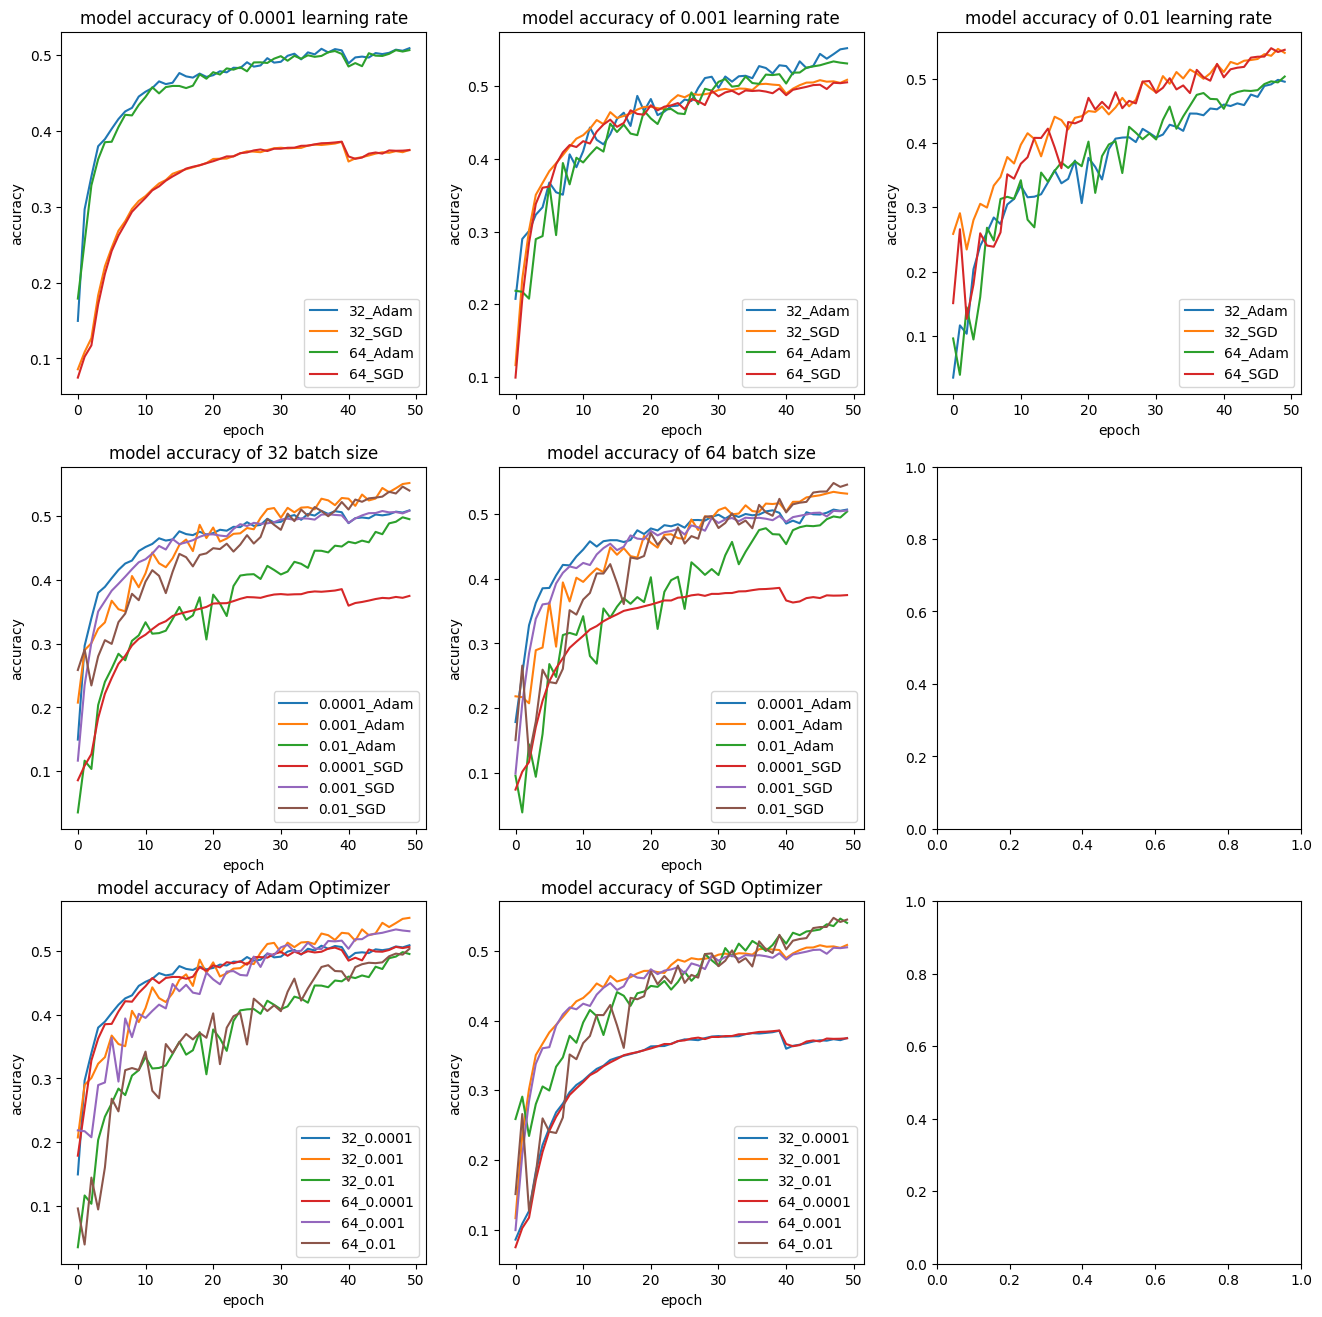

<Figure size 4000x4000 with 0 Axes>

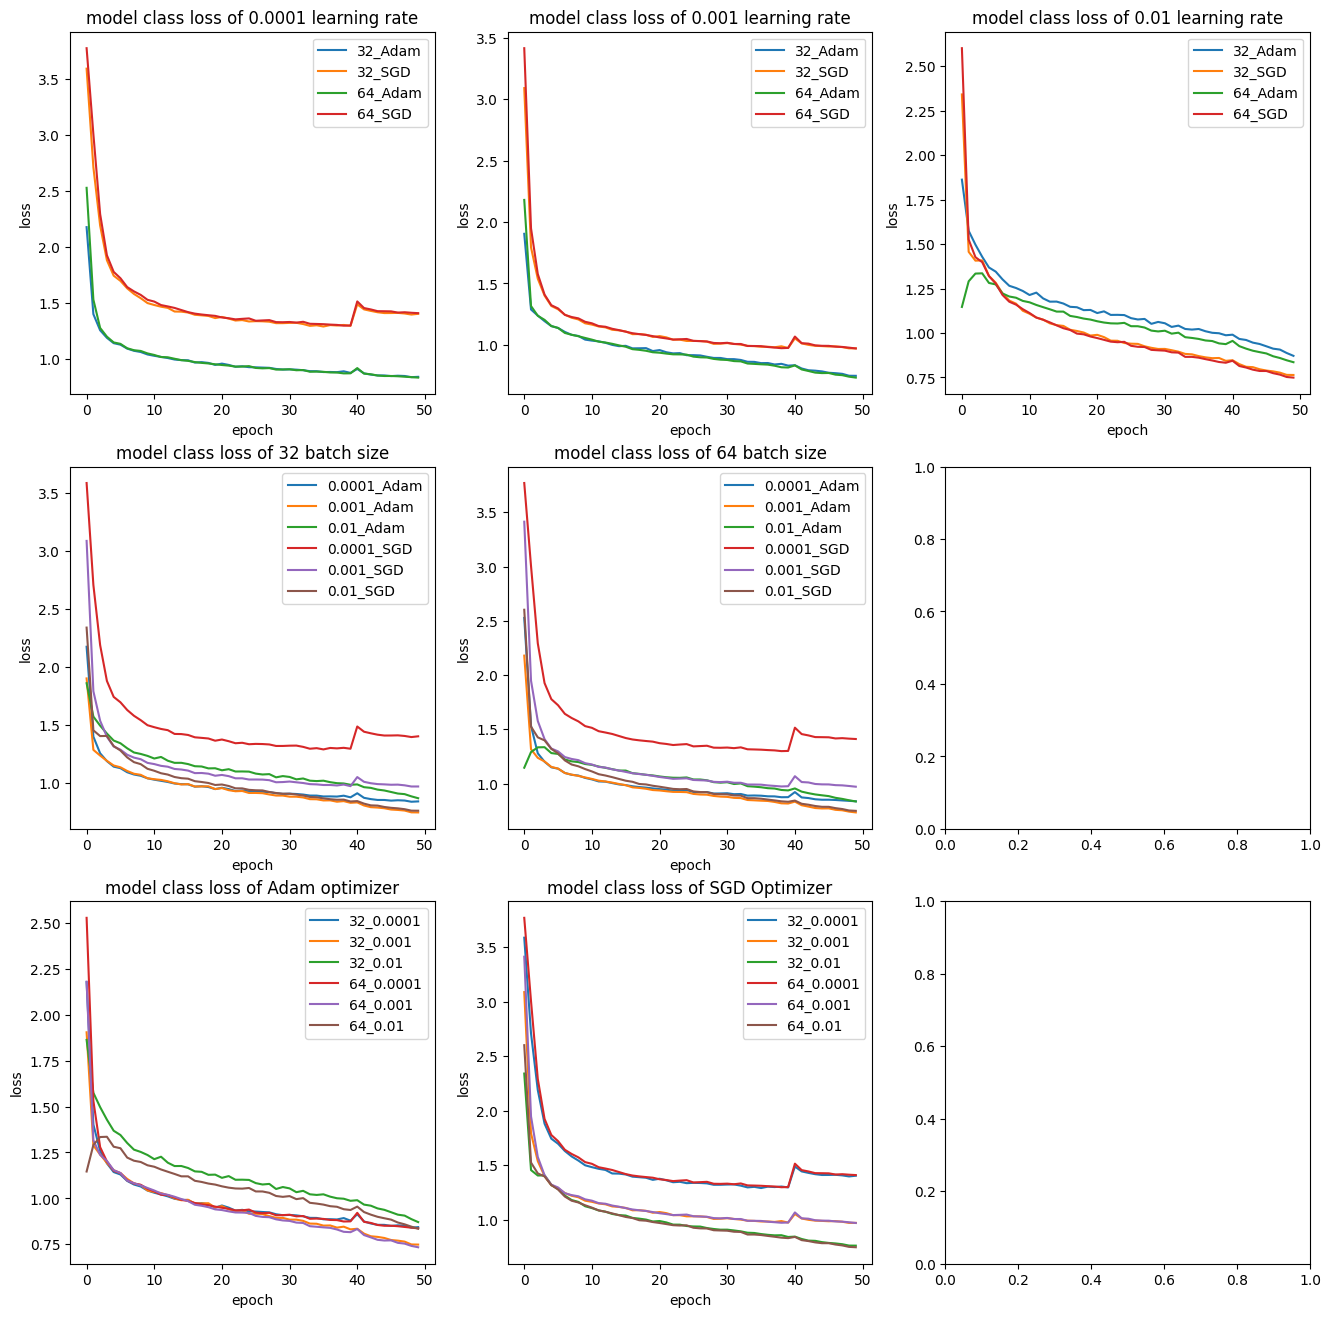

In [ ]:
import matplotlib.pyplot as plt
df_0 = pd.read_csv('/content/32_0.0001_Adam.csv')
df_1 = pd.read_csv('/content/32_0.001_Adam.csv')
df_2 = pd.read_csv('/content/32_0.01_Adam.csv')
df_3 = pd.read_csv('/content/32_0.0001_SGD.csv')
df_4 = pd.read_csv('/content/32_0.001_SGD.csv')
df_5 = pd.read_csv('/content/32_0.01_SGD.csv')
df_6 = pd.read_csv('/content/64_0.0001_Adam.csv')
df_7 = pd.read_csv('/content/64_0.001_Adam.csv')
df_8 = pd.read_csv('/content/64_0.01_Adam.csv')
df_9 = pd.read_csv('/content/64_0.0001_SGD.csv')
df_10 = pd.read_csv('/content/64_0.001_SGD.csv')
df_11 = pd.read_csv('/content/64_0.01_SGD.csv')

# Summarize history for Accuracy
fig, ax = plt.subplots(3, 3, figsize=(16, 16))

### Check difference between batch size and optimizer ###
# When learning rate is 0.0001
ax[0, 0].plot(df_0['       metrics/mAP50(B)'])
ax[0, 0].plot(df_3['       metrics/mAP50(B)'])
ax[0, 0].plot(df_6['       metrics/mAP50(B)'])
ax[0, 0].plot(df_9['       metrics/mAP50(B)'])
ax[0, 0].title.set_text('model accuracy of 0.0001 learning rate')
ax[0, 0].set_ylabel('accuracy')
ax[0, 0].set_xlabel('epoch')
ax[0, 0].legend(['32_Adam', '32_SGD', '64_Adam', '64_SGD'], loc='lower right')

# When learning rate is 0.001
ax[0, 1].plot(df_1['       metrics/mAP50(B)'])
ax[0, 1].plot(df_4['       metrics/mAP50(B)'])
ax[0, 1].plot(df_7['       metrics/mAP50(B)'])
ax[0, 1].plot(df_10['       metrics/mAP50(B)'])
ax[0, 1].title.set_text('model accuracy of 0.001 learning rate')
ax[0, 1].set_ylabel('accuracy')
ax[0, 1].set_xlabel('epoch')
ax[0, 1].legend(['32_Adam', '32_SGD', '64_Adam', '64_SGD'], loc='lower right')

# When learning rate is 0.01
ax[0, 2].plot(df_2['       metrics/mAP50(B)'])
ax[0, 2].plot(df_5['       metrics/mAP50(B)'])
ax[0, 2].plot(df_8['       metrics/mAP50(B)'])
ax[0, 2].plot(df_11['       metrics/mAP50(B)'])
ax[0, 2].title.set_text('model accuracy of 0.01 learning rate')
ax[0, 2].set_ylabel('accuracy')
ax[0, 2].set_xlabel('epoch')
ax[0, 2].legend(['32_Adam', '32_SGD', '64_Adam', '64_SGD'], loc='lower right')

### Check difference between learning rate and optimizer ###
# When batch size is 32
ax[1, 0].plot(df_0['       metrics/mAP50(B)'])
ax[1, 0].plot(df_1['       metrics/mAP50(B)'])
ax[1, 0].plot(df_2['       metrics/mAP50(B)'])
ax[1, 0].plot(df_3['       metrics/mAP50(B)'])
ax[1, 0].plot(df_4['       metrics/mAP50(B)'])
ax[1, 0].plot(df_5['       metrics/mAP50(B)'])
ax[1, 0].title.set_text('model accuracy of 32 batch size')
ax[1, 0].set_ylabel('accuracy')
ax[1, 0].set_xlabel('epoch')
ax[1, 0].legend(['0.0001_Adam', '0.001_Adam', '0.01_Adam',
            '0.0001_SGD', '0.001_SGD', '0.01_SGD'], loc='lower right')

# When batch size is 64
ax[1, 1].plot(df_6['       metrics/mAP50(B)'])
ax[1, 1].plot(df_7['       metrics/mAP50(B)'])
ax[1, 1].plot(df_8['       metrics/mAP50(B)'])
ax[1, 1].plot(df_9['       metrics/mAP50(B)'])
ax[1, 1].plot(df_10['       metrics/mAP50(B)'])
ax[1, 1].plot(df_11['       metrics/mAP50(B)'])
ax[1, 1].title.set_text('model accuracy of 64 batch size')
ax[1, 1].set_ylabel('accuracy')
ax[1, 1].set_xlabel('epoch')
ax[1, 1].legend(['0.0001_Adam', '0.001_Adam', '0.01_Adam',
            '0.0001_SGD', '0.001_SGD', '0.01_SGD'], loc='lower right')

### Check difference between learning rate and batch size ###
# When optimizer is Adam
ax[2, 0].plot(df_0['       metrics/mAP50(B)'])
ax[2, 0].plot(df_1['       metrics/mAP50(B)'])
ax[2, 0].plot(df_2['       metrics/mAP50(B)'])
ax[2, 0].plot(df_6['       metrics/mAP50(B)'])
ax[2, 0].plot(df_7['       metrics/mAP50(B)'])
ax[2, 0].plot(df_8['       metrics/mAP50(B)'])
ax[2, 0].title.set_text('model accuracy of Adam Optimizer')
ax[2, 0].set_ylabel('accuracy')
ax[2, 0].set_xlabel('epoch')
ax[2, 0].legend(['32_0.0001', '32_0.001', '32_0.01',
            '64_0.0001', '64_0.001', '64_0.01'], loc='lower right')

# When optimizer is SGD
ax[2, 1].plot(df_3['       metrics/mAP50(B)'])
ax[2, 1].plot(df_4['       metrics/mAP50(B)'])
ax[2, 1].plot(df_5['       metrics/mAP50(B)'])
ax[2, 1].plot(df_9['       metrics/mAP50(B)'])
ax[2, 1].plot(df_10['       metrics/mAP50(B)'])
ax[2, 1].plot(df_11['       metrics/mAP50(B)'])
ax[2, 1].title.set_text('model accuracy of SGD Optimizer')
ax[2, 1].set_ylabel('accuracy')
ax[2, 1].set_xlabel('epoch')
ax[2, 1].legend(['32_0.0001', '32_0.001', '32_0.01',
            '64_0.0001', '64_0.001', '64_0.01'], loc='lower right')

plt.figure(figsize=(40,40))
plt.show()


# Summarize history for Loss(Class Loss)
fig, ax = plt.subplots(3, 3, figsize=(16, 16))

### Check difference between batch size and optimizer ###
# When learning rate is 0.0001
ax[0, 0].plot(df_0['         train/cls_loss'])
ax[0, 0].plot(df_3['         train/cls_loss'])
ax[0, 0].plot(df_6['         train/cls_loss'])
ax[0, 0].plot(df_9['         train/cls_loss'])
ax[0, 0].title.set_text('model class loss of 0.0001 learning rate')
ax[0, 0].set_ylabel('loss')
ax[0, 0].set_xlabel('epoch')
ax[0, 0].legend(['32_Adam', '32_SGD', '64_Adam', '64_SGD'], loc='upper right')

# When learning rate is 0.001
ax[0, 1].plot(df_1['         train/cls_loss'])
ax[0, 1].plot(df_4['         train/cls_loss'])
ax[0, 1].plot(df_7['         train/cls_loss'])
ax[0, 1].plot(df_10['         train/cls_loss'])
ax[0, 1].title.set_text('model class loss of 0.001 learning rate')
ax[0, 1].set_ylabel('loss')
ax[0, 1].set_xlabel('epoch')
ax[0, 1].legend(['32_Adam', '32_SGD', '64_Adam', '64_SGD'], loc='upper right')

# When learning rate is 0.01
ax[0, 2].plot(df_2['         train/cls_loss'])
ax[0, 2].plot(df_5['         train/cls_loss'])
ax[0, 2].plot(df_8['         train/cls_loss'])
ax[0, 2].plot(df_11['         train/cls_loss'])
ax[0, 2].title.set_text('model class loss of 0.01 learning rate')
ax[0, 2].set_ylabel('loss')
ax[0, 2].set_xlabel('epoch')
ax[0, 2].legend(['32_Adam', '32_SGD', '64_Adam', '64_SGD'], loc='upper right')

### Check difference between learning rate and optimizer ###
# When batch size is 32
ax[1, 0].plot(df_0['         train/cls_loss'])
ax[1, 0].plot(df_1['         train/cls_loss'])
ax[1, 0].plot(df_2['         train/cls_loss'])
ax[1, 0].plot(df_3['         train/cls_loss'])
ax[1, 0].plot(df_4['         train/cls_loss'])
ax[1, 0].plot(df_5['         train/cls_loss'])
ax[1, 0].title.set_text('model class loss of 32 batch size')
ax[1, 0].set_ylabel('loss')
ax[1, 0].set_xlabel('epoch')
ax[1, 0].legend(['0.0001_Adam', '0.001_Adam', '0.01_Adam',
            '0.0001_SGD', '0.001_SGD', '0.01_SGD'], loc='upper right')

# When batch size is 64
ax[1, 1].plot(df_6['         train/cls_loss'])
ax[1, 1].plot(df_7['         train/cls_loss'])
ax[1, 1].plot(df_8['         train/cls_loss'])
ax[1, 1].plot(df_9['         train/cls_loss'])
ax[1, 1].plot(df_10['         train/cls_loss'])
ax[1, 1].plot(df_11['         train/cls_loss'])
ax[1, 1].title.set_text('model class loss of 64 batch size')
ax[1, 1].set_ylabel('loss')
ax[1, 1].set_xlabel('epoch')
ax[1, 1].legend(['0.0001_Adam', '0.001_Adam', '0.01_Adam',
            '0.0001_SGD', '0.001_SGD', '0.01_SGD'], loc='upper right')

### Check difference between learning rate and batch size ###
# When optimizer is Adam
ax[2, 0].plot(df_0['         train/cls_loss'])
ax[2, 0].plot(df_1['         train/cls_loss'])
ax[2, 0].plot(df_2['         train/cls_loss'])
ax[2, 0].plot(df_6['         train/cls_loss'])
ax[2, 0].plot(df_7['         train/cls_loss'])
ax[2, 0].plot(df_8['         train/cls_loss'])
ax[2, 0].title.set_text('model class loss of Adam optimizer')
ax[2, 0].set_ylabel('loss')
ax[2, 0].set_xlabel('epoch')
ax[2, 0].legend(['32_0.0001', '32_0.001', '32_0.01',
            '64_0.0001', '64_0.001', '64_0.01'], loc='upper right')

# When optimizer is SGD
ax[2, 1].plot(df_3['         train/cls_loss'])
ax[2, 1].plot(df_4['         train/cls_loss'])
ax[2, 1].plot(df_5['         train/cls_loss'])
ax[2, 1].plot(df_9['         train/cls_loss'])
ax[2, 1].plot(df_10['         train/cls_loss'])
ax[2, 1].plot(df_11['         train/cls_loss'])
ax[2, 1].title.set_text('model class loss of SGD Optimizer')
ax[2, 1].set_ylabel('loss')
ax[2, 1].set_xlabel('epoch')
ax[2, 1].legend(['32_0.0001', '32_0.001', '32_0.01',
            '64_0.0001', '64_0.001', '64_0.01'], loc='upper right')

plt.show()

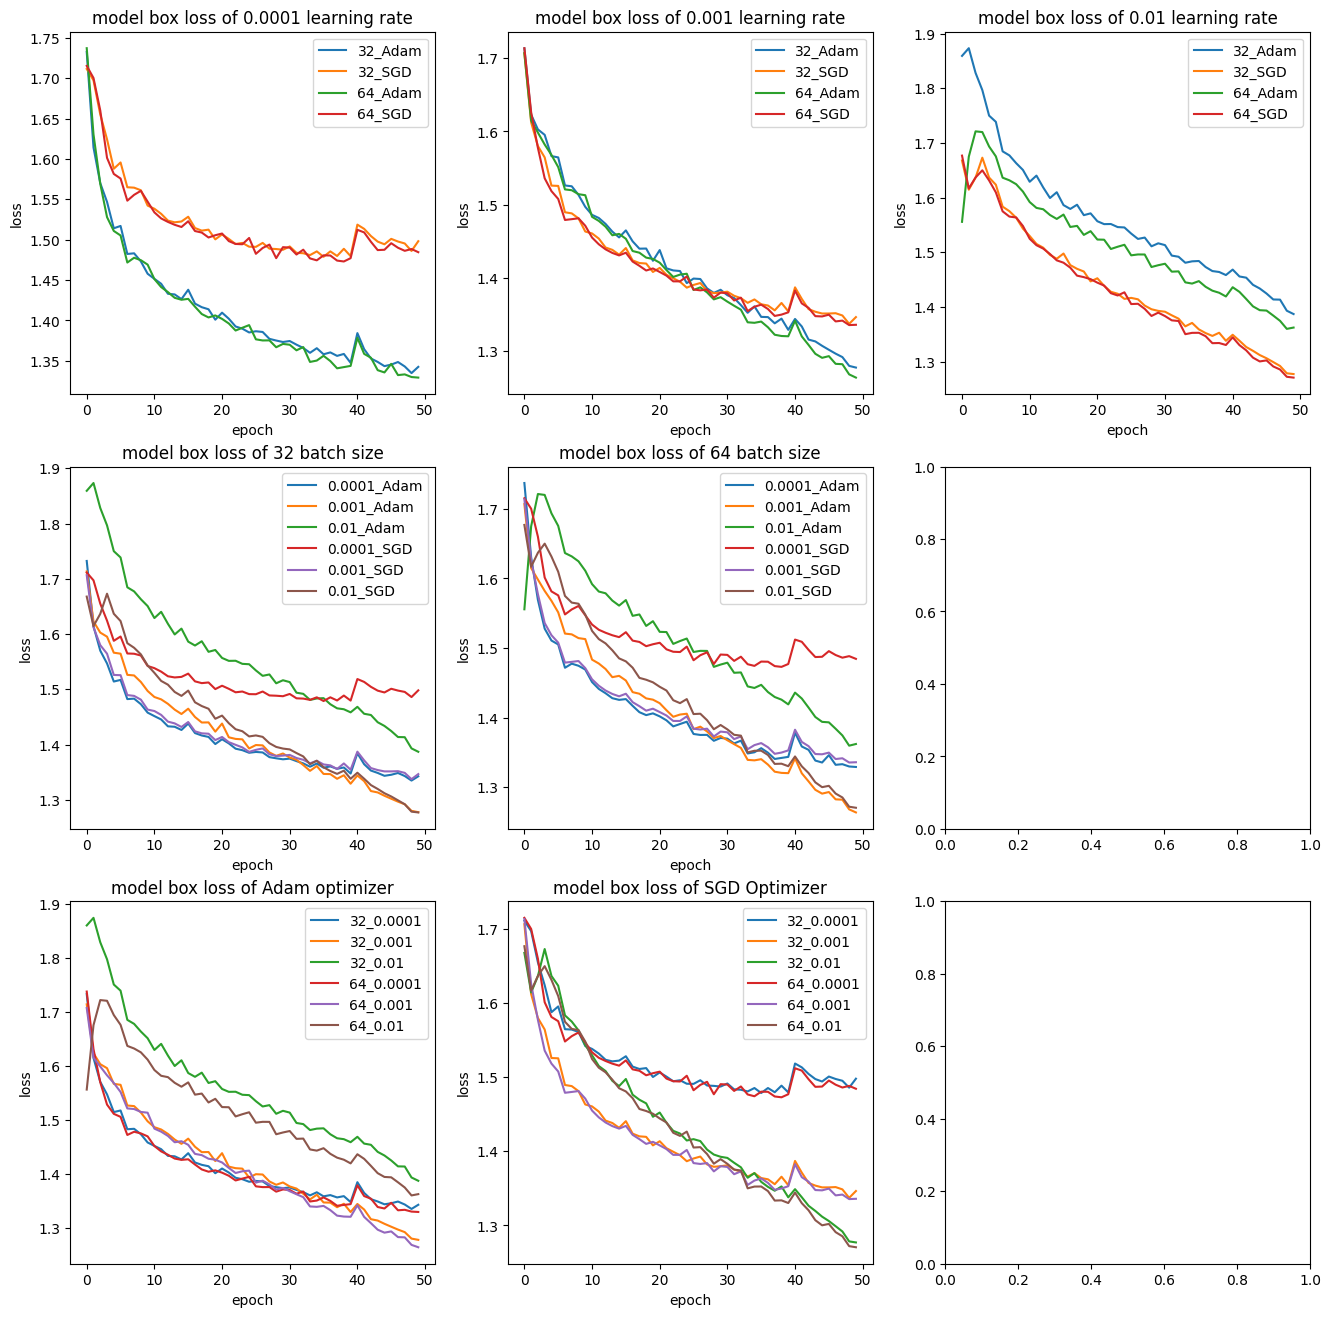

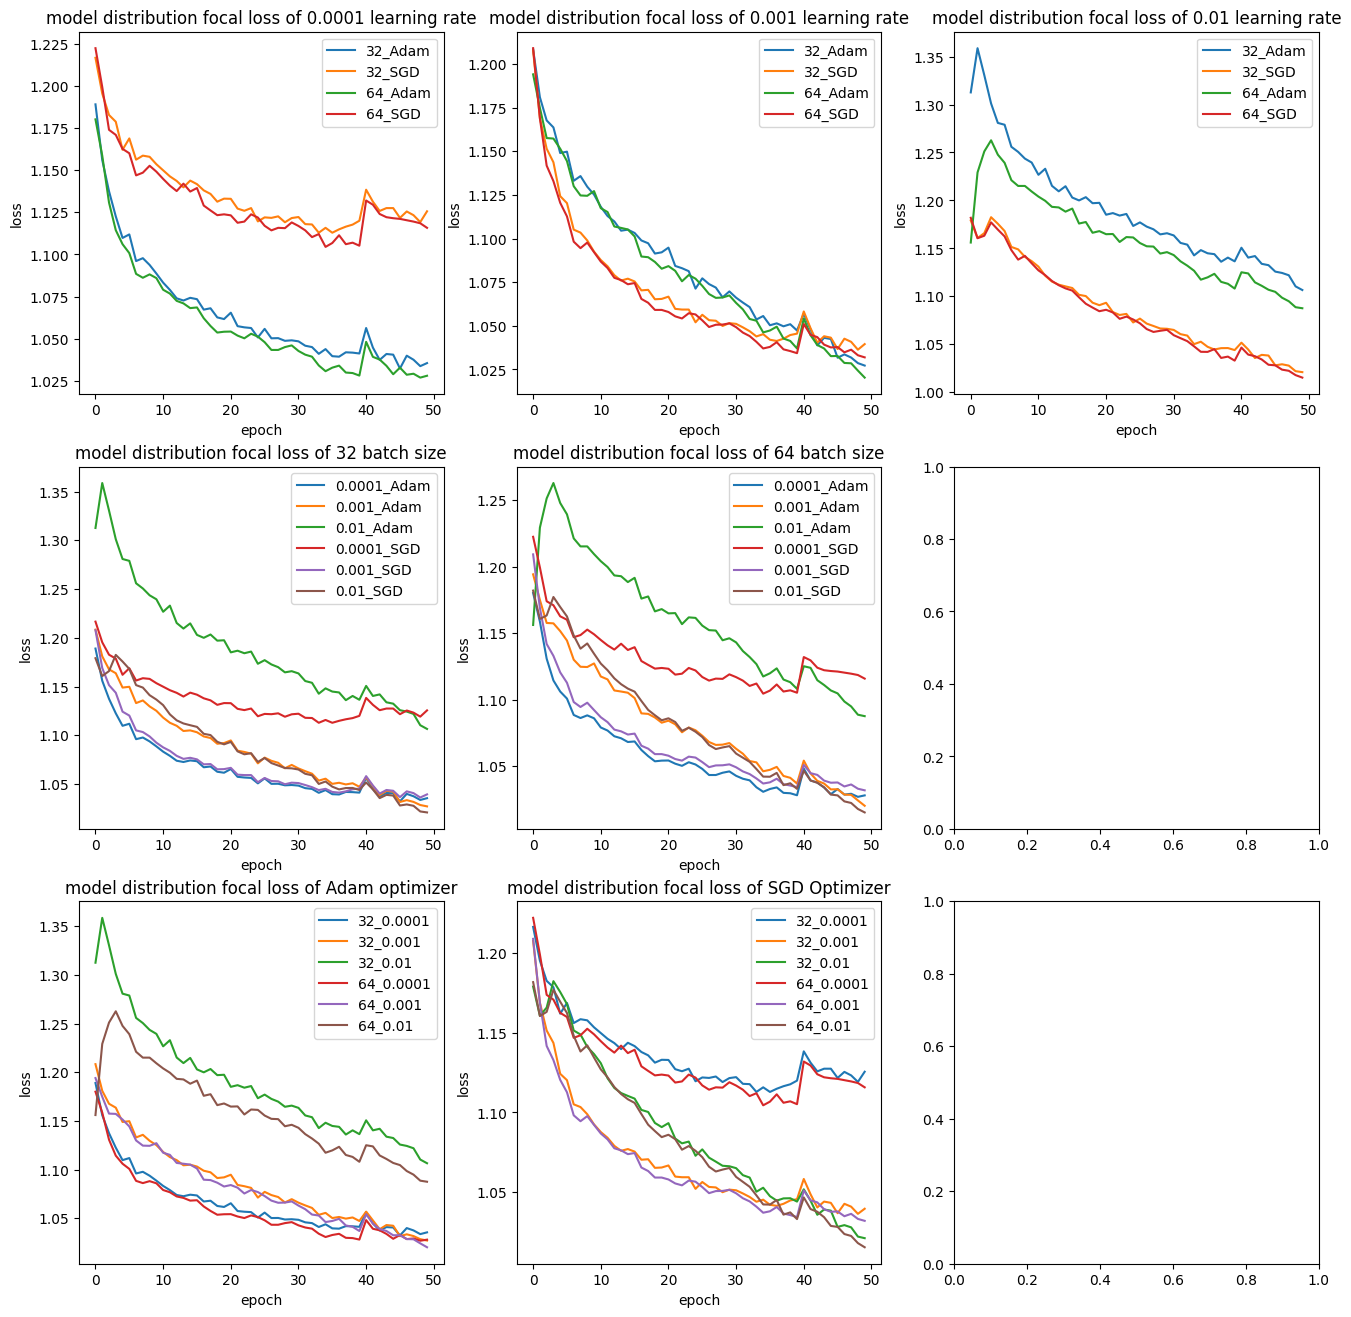

In [ ]:
# Summarize history of Loss(Box Loss)
fig, ax = plt.subplots(3, 3, figsize=(16, 16))

### Check difference between batch size and optimizer ###
# When learning rate is 0.0001
ax[0, 0].plot(df_0['         train/box_loss'])
ax[0, 0].plot(df_3['         train/box_loss'])
ax[0, 0].plot(df_6['         train/box_loss'])
ax[0, 0].plot(df_9['         train/box_loss'])
ax[0, 0].title.set_text('model box loss of 0.0001 learning rate')
ax[0, 0].set_ylabel('loss')
ax[0, 0].set_xlabel('epoch')
ax[0, 0].legend(['32_Adam', '32_SGD', '64_Adam', '64_SGD'], loc='upper right')

# When learning rate is 0.001
ax[0, 1].plot(df_1['         train/box_loss'])
ax[0, 1].plot(df_4['         train/box_loss'])
ax[0, 1].plot(df_7['         train/box_loss'])
ax[0, 1].plot(df_10['         train/box_loss'])
ax[0, 1].title.set_text('model box loss of 0.001 learning rate')
ax[0, 1].set_ylabel('loss')
ax[0, 1].set_xlabel('epoch')
ax[0, 1].legend(['32_Adam', '32_SGD', '64_Adam', '64_SGD'], loc='upper right')

# When learning rate is 0.01
ax[0, 2].plot(df_2['         train/box_loss'])
ax[0, 2].plot(df_5['         train/box_loss'])
ax[0, 2].plot(df_8['         train/box_loss'])
ax[0, 2].plot(df_11['         train/box_loss'])
ax[0, 2].title.set_text('model box loss of 0.01 learning rate')
ax[0, 2].set_ylabel('loss')
ax[0, 2].set_xlabel('epoch')
ax[0, 2].legend(['32_Adam', '32_SGD', '64_Adam', '64_SGD'], loc='upper right')

### Check difference between learning rate and optimizer ###
# When batch size is 32
ax[1, 0].plot(df_0['         train/box_loss'])
ax[1, 0].plot(df_1['         train/box_loss'])
ax[1, 0].plot(df_2['         train/box_loss'])
ax[1, 0].plot(df_3['         train/box_loss'])
ax[1, 0].plot(df_4['         train/box_loss'])
ax[1, 0].plot(df_5['         train/box_loss'])
ax[1, 0].title.set_text('model box loss of 32 batch size')
ax[1, 0].set_ylabel('loss')
ax[1, 0].set_xlabel('epoch')
ax[1, 0].legend(['0.0001_Adam', '0.001_Adam', '0.01_Adam',
            '0.0001_SGD', '0.001_SGD', '0.01_SGD'], loc='upper right')

# When batch size is 64
ax[1, 1].plot(df_6['         train/box_loss'])
ax[1, 1].plot(df_7['         train/box_loss'])
ax[1, 1].plot(df_8['         train/box_loss'])
ax[1, 1].plot(df_9['         train/box_loss'])
ax[1, 1].plot(df_10['         train/box_loss'])
ax[1, 1].plot(df_11['         train/box_loss'])
ax[1, 1].title.set_text('model box loss of 64 batch size')
ax[1, 1].set_ylabel('loss')
ax[1, 1].set_xlabel('epoch')
ax[1, 1].legend(['0.0001_Adam', '0.001_Adam', '0.01_Adam',
            '0.0001_SGD', '0.001_SGD', '0.01_SGD'], loc='upper right')

### Check difference between learning rate and batch size ###
# When optimizer is Adam
ax[2, 0].plot(df_0['         train/box_loss'])
ax[2, 0].plot(df_1['         train/box_loss'])
ax[2, 0].plot(df_2['         train/box_loss'])
ax[2, 0].plot(df_6['         train/box_loss'])
ax[2, 0].plot(df_7['         train/box_loss'])
ax[2, 0].plot(df_8['         train/box_loss'])
ax[2, 0].title.set_text('model box loss of Adam optimizer')
ax[2, 0].set_ylabel('loss')
ax[2, 0].set_xlabel('epoch')
ax[2, 0].legend(['32_0.0001', '32_0.001', '32_0.01',
            '64_0.0001', '64_0.001', '64_0.01'], loc='upper right')

# When optimizer is SGD
ax[2, 1].plot(df_3['         train/box_loss'])
ax[2, 1].plot(df_4['         train/box_loss'])
ax[2, 1].plot(df_5['         train/box_loss'])
ax[2, 1].plot(df_9['         train/box_loss'])
ax[2, 1].plot(df_10['         train/box_loss'])
ax[2, 1].plot(df_11['         train/box_loss'])
ax[2, 1].title.set_text('model box loss of SGD Optimizer')
ax[2, 1].set_ylabel('loss')
ax[2, 1].set_xlabel('epoch')
ax[2, 1].legend(['32_0.0001', '32_0.001', '32_0.01',
            '64_0.0001', '64_0.001', '64_0.01'], loc='upper right')
plt.show()

# Summarize history of Loss(Distributional Focal Loss)
fig, ax = plt.subplots(3, 3, figsize=(16, 16))

### Check difference between batch size and optimizer ###
# When learning rate is 0.0001
ax[0, 0].plot(df_0['         train/dfl_loss'])
ax[0, 0].plot(df_3['         train/dfl_loss'])
ax[0, 0].plot(df_6['         train/dfl_loss'])
ax[0, 0].plot(df_9['         train/dfl_loss'])
ax[0, 0].title.set_text('model distribution focal loss of 0.0001 learning rate')
ax[0, 0].set_ylabel('loss')
ax[0, 0].set_xlabel('epoch')
ax[0, 0].legend(['32_Adam', '32_SGD', '64_Adam', '64_SGD'], loc='upper right')

# When learning rate is 0.001
ax[0, 1].plot(df_1['         train/dfl_loss'])
ax[0, 1].plot(df_4['         train/dfl_loss'])
ax[0, 1].plot(df_7['         train/dfl_loss'])
ax[0, 1].plot(df_10['         train/dfl_loss'])
ax[0, 1].title.set_text('model distribution focal loss of 0.001 learning rate')
ax[0, 1].set_ylabel('loss')
ax[0, 1].set_xlabel('epoch')
ax[0, 1].legend(['32_Adam', '32_SGD', '64_Adam', '64_SGD'], loc='upper right')

# When learning rate is 0.01
ax[0, 2].plot(df_2['         train/dfl_loss'])
ax[0, 2].plot(df_5['         train/dfl_loss'])
ax[0, 2].plot(df_8['         train/dfl_loss'])
ax[0, 2].plot(df_11['         train/dfl_loss'])
ax[0, 2].title.set_text('model distribution focal loss of 0.01 learning rate')
ax[0, 2].set_ylabel('loss')
ax[0, 2].set_xlabel('epoch')
ax[0, 2].legend(['32_Adam', '32_SGD', '64_Adam', '64_SGD'], loc='upper right')

### Check difference between learning rate and optimizer ###
# When batch size is 32
ax[1, 0].plot(df_0['         train/dfl_loss'])
ax[1, 0].plot(df_1['         train/dfl_loss'])
ax[1, 0].plot(df_2['         train/dfl_loss'])
ax[1, 0].plot(df_3['         train/dfl_loss'])
ax[1, 0].plot(df_4['         train/dfl_loss'])
ax[1, 0].plot(df_5['         train/dfl_loss'])
ax[1, 0].title.set_text('model distribution focal loss of 32 batch size')
ax[1, 0].set_ylabel('loss')
ax[1, 0].set_xlabel('epoch')
ax[1, 0].legend(['0.0001_Adam', '0.001_Adam', '0.01_Adam',
            '0.0001_SGD', '0.001_SGD', '0.01_SGD'], loc='upper right')

# When batch size is 64
ax[1, 1].plot(df_6['         train/dfl_loss'])
ax[1, 1].plot(df_7['         train/dfl_loss'])
ax[1, 1].plot(df_8['         train/dfl_loss'])
ax[1, 1].plot(df_9['         train/dfl_loss'])
ax[1, 1].plot(df_10['         train/dfl_loss'])
ax[1, 1].plot(df_11['         train/dfl_loss'])
ax[1, 1].title.set_text('model distribution focal loss of 64 batch size')
ax[1, 1].set_ylabel('loss')
ax[1, 1].set_xlabel('epoch')
ax[1, 1].legend(['0.0001_Adam', '0.001_Adam', '0.01_Adam',
            '0.0001_SGD', '0.001_SGD', '0.01_SGD'], loc='upper right')

### Check difference between learning rate and batch size ###
# When optimizer is Adam
ax[2, 0].plot(df_0['         train/dfl_loss'])
ax[2, 0].plot(df_1['         train/dfl_loss'])
ax[2, 0].plot(df_2['         train/dfl_loss'])
ax[2, 0].plot(df_6['         train/dfl_loss'])
ax[2, 0].plot(df_7['         train/dfl_loss'])
ax[2, 0].plot(df_8['         train/dfl_loss'])
ax[2, 0].title.set_text('model distribution focal loss of Adam optimizer')
ax[2, 0].set_ylabel('loss')
ax[2, 0].set_xlabel('epoch')
ax[2, 0].legend(['32_0.0001', '32_0.001', '32_0.01',
            '64_0.0001', '64_0.001', '64_0.01'], loc='upper right')

# When optimizer is SGD
ax[2, 1].plot(df_3['         train/dfl_loss'])
ax[2, 1].plot(df_4['         train/dfl_loss'])
ax[2, 1].plot(df_5['         train/dfl_loss'])
ax[2, 1].plot(df_9['         train/dfl_loss'])
ax[2, 1].plot(df_10['         train/dfl_loss'])
ax[2, 1].plot(df_11['         train/dfl_loss'])
ax[2, 1].title.set_text('model distribution focal loss of SGD Optimizer')
ax[2, 1].set_ylabel('loss')
ax[2, 1].set_xlabel('epoch')
ax[2, 1].legend(['32_0.0001', '32_0.001', '32_0.01',
            '64_0.0001', '64_0.001', '64_0.01'], loc='upper right')
plt.show()

Check difference of accuarcy(mAP50)

In [ ]:
import pandas as pd

# Batch size, learning rate, optimizer
df = pd.read_csv('/content/drive/MyDrive/LGInternship/Hyperparameter.csv')
df = df.drop('Id', axis = 1)
df = df.drop('Box(P', axis = 1)
df = df.drop('R', axis = 1)
df = df.drop('dropout', axis = 1)
df = df.drop('image_size', axis = 1)
df.head()

FileNotFoundError: ignored

In [ ]:
# Regularization (dropout)
df_dropout = pd.read_csv('/content/drive/MyDrive/LGInternship/Hyperparameter(dropout).csv')
df_dropout = df_dropout.drop('Id', axis = 1)
df_dropout = df_dropout.drop('Box(P', axis = 1)
df_dropout = df_dropout.drop('R', axis = 1)
df_dropout = df_dropout.drop('batch_size', axis = 1)
df_dropout = df_dropout.drop('learning_rate', axis = 1)
df_dropout = df_dropout.drop('optimizer', axis = 1)
df_dropout = df_dropout.drop('image_size', axis = 1)
df_dropout.head()

Class  Images  Instance  mAP50  mAP50-95  dropout
0         all   909.0    5869.0  0.545     0.294      0.0
1         car   909.0    4021.0  0.822     0.516      0.0
2       truck   909.0     244.0  0.613     0.393      0.0
3  pedestrian   909.0     499.0  0.536     0.244      0.0
4   bicyclist   909.0      37.0  0.311     0.141      0.0

In [ ]:
# Image size
df_imgsz = pd.read_csv('/content/drive/MyDrive/LGInternship/Hyperparameter(imgsz).csv')
df_imgsz = df_imgsz.drop('Id', axis = 1)
df_imgsz = df_imgsz.drop('Box(P', axis = 1)
df_imgsz = df_imgsz.drop('R', axis = 1)
df_imgsz = df_imgsz.drop('batch_size', axis = 1)
df_imgsz = df_imgsz.drop('learning_rate', axis = 1)
df_imgsz = df_imgsz.drop('optimizer', axis = 1)
df_imgsz = df_imgsz.drop('dropout', axis = 1)
df_imgsz.head()

Class  Images  Instance   mAP50  mAP50-95  image_size
0         all   909.0    5869.0  0.2340    0.1200       192.0
1         car   909.0    4021.0  0.5420    0.3030       192.0
2       truck   909.0     244.0  0.3420    0.2140       192.0
3  pedestrian   909.0     499.0  0.1180    0.0370       192.0
4   bicyclist   909.0      37.0  0.0674    0.0248       192.0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Preprocessing to get only mAP50

In [ ]:
df = df.drop('Images', axis = 1)
df = df.drop('Instance', axis = 1)
df = df.drop('mAP50-95', axis = 1)
df.head()

Class  mAP50  batch_size  learning_rate optimizer
0         all  0.514        32.0         0.0001      Adam
1         car  0.806        32.0         0.0001      Adam
2       truck  0.559        32.0         0.0001      Adam
3  pedestrian  0.542        32.0         0.0001      Adam
4   bicyclist  0.266        32.0         0.0001      Adam

In [ ]:
df_192 = df_imgsz[df_imgsz['image_size'] == 192]
df_416 = df_imgsz[df_imgsz['image_size'] == 416]
df_640 = df_imgsz[df_imgsz['image_size'] == 640]

In [ ]:
df_192.head()

Class  Images  Instance   mAP50  mAP50-95  image_size
0         all   909.0    5869.0  0.2340    0.1200       192.0
1         car   909.0    4021.0  0.5420    0.3030       192.0
2       truck   909.0     244.0  0.3420    0.2140       192.0
3  pedestrian   909.0     499.0  0.1180    0.0370       192.0
4   bicyclist   909.0      37.0  0.0674    0.0248       192.0
5       light   909.0     479.0  0.2180    0.0845       192.0
6     pothole   909.0     589.0  0.1190    0.0550       192.0

In [ ]:
df_416.head()

Class  Images  Instance  mAP50  mAP50-95  image_size
7          all   909.0    5869.0  0.449    0.2340       416.0
8          car   909.0    4021.0  0.766    0.4650       416.0
9        truck   909.0     244.0  0.541    0.3400       416.0
10  pedestrian   909.0     499.0  0.396    0.1700       416.0
11   bicyclist   909.0      37.0  0.155    0.0616       416.0
12       light   909.0     479.0  0.596    0.2620       416.0
13     pothole   909.0     589.0  0.240    0.1080       416.0

In [ ]:
df_640.head()

Class  Images  Instance  mAP50  mAP50-95  image_size
14         all   909.0    5869.0  0.545     0.294       640.0
15         car   909.0    4021.0  0.822     0.516       640.0
16       truck   909.0     244.0  0.613     0.393       640.0
17  pedestrian   909.0     499.0  0.536     0.244       640.0
18   bicyclist   909.0      37.0  0.311     0.141       640.0
19       light   909.0     479.0  0.688     0.333       640.0
20     pothole   909.0     589.0  0.303     0.136       640.0

<ipython-input-177-9de636f05a60>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classes)


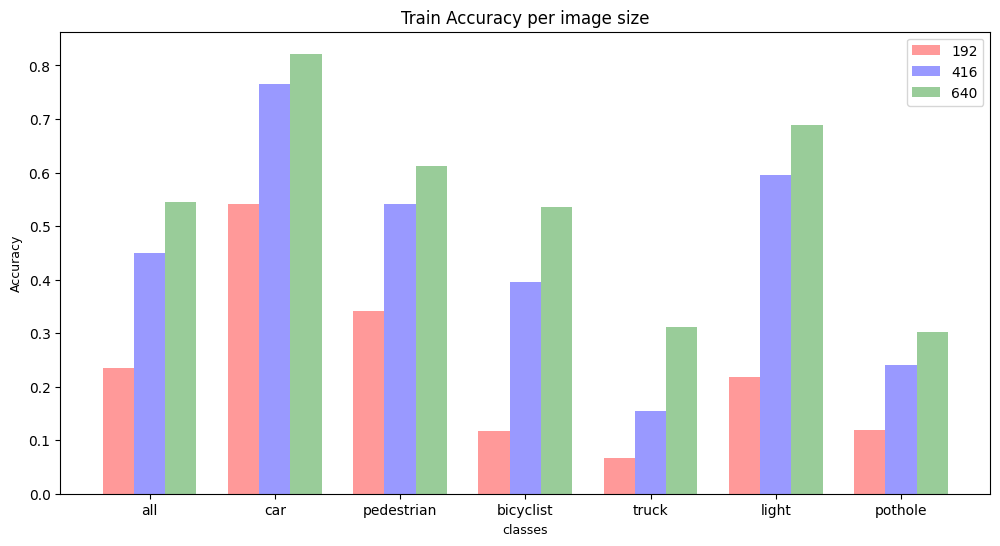

In [ ]:
import numpy as np


### Difference of <Image Size> ###
image_sizes = [192, 416, 640]
classes = [' ','All', 'Car', 'Pedestrian', 'Bicyclist', 'Truck', 'Light', 'Pothole']

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# Number of Classes is 7 (All, Car, Pedestrian, Bicyclist, Truck, Light, Pothole)
index = np.arange(7)

# The process of sequentially representing three accuracy bars for each model. Each graph is drawn at intervals of 0.25
ax.set_xticklabels(classes)
b1 = plt.bar(index - bar_width, df_192['mAP50'], bar_width, alpha=0.4, color='red', label='192')
b2 = plt.bar(index, df_416['mAP50'], bar_width, alpha=0.4, color='blue', label='416')
b3 = plt.bar(index + bar_width, df_640['mAP50'], bar_width, alpha=0.4, color='green', label='640')


plt.xlabel('classes', size = 9)
plt.ylabel('Accuracy', size = 9)
plt.legend()
plt.title('Train Accuracy per image size')
plt.show()

In [ ]:
df_0.head()

Class  Images  Instance  mAP50  mAP50-95  dropout
0         all   909.0    5869.0  0.545     0.294      0.0
1         car   909.0    4021.0  0.822     0.516      0.0
2       truck   909.0     244.0  0.613     0.393      0.0
3  pedestrian   909.0     499.0  0.536     0.244      0.0
4   bicyclist   909.0      37.0  0.311     0.141      0.0

<ipython-input-93-2da6b1799e33>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classes)


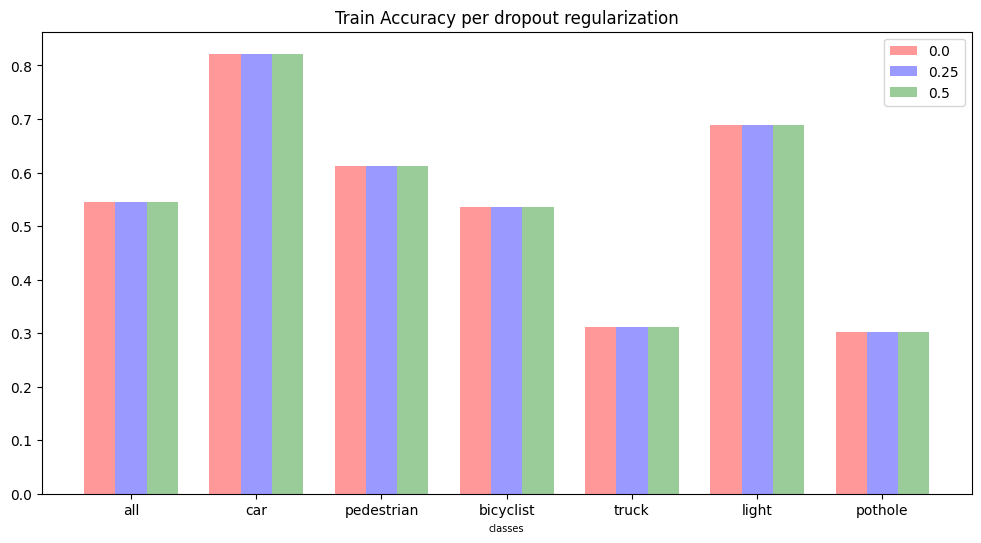

In [ ]:
### Difference of <Regularization (Dropout)> ###
df_0 = df_dropout[df_dropout['dropout'] == 0]
df_25 = df_dropout[df_dropout['dropout'] == .25]
df_50 = df_dropout[df_dropout['dropout'] == .5]
dropouts = [0, 0.25, 0.5]
classes = [' ','All', 'Car', 'Pedestrian', 'Bicyclist', 'Truck', 'Light', 'Pothole']

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# Number of Classes is 7 (All, Car, Pedestrian, Bicyclist, Truck, Light, Pothole)
index = np.arange(7)

# The process of sequentially representing three accuracy bars for each model. Each graph is drawn at intervals of 0.25
b1 = plt.bar(index - bar_width, df_0['mAP50'], bar_width, alpha=0.4, color='red', label='0.0')
b2 = plt.bar(index, df_25['mAP50'], bar_width, alpha=0.4, color='blue', label='0.25')

b3 = plt.bar(index + bar_width, df_50['mAP50'], bar_width, alpha=0.4, color='green', label='0.5')
ax.set_xticklabels(classes)

plt.xlabel('classes', size = 7)
plt.legend()
plt.title('Train Accuracy per dropout regularization')
plt.show()

Preprocessing to get graphs of correlations between batch size, learning speed, and optimization tools

In [ ]:
df.loc[df['optimizer'] == 'Adam', 'optimizer'] = 0
df.loc[df['optimizer'] == 'SGD', 'optimizer'] = 1
df.head()

Class  mAP50  batch_size  learning_rate optimizer
0         all  0.514        32.0         0.0001         0
1         car  0.806        32.0         0.0001         0
2       truck  0.559        32.0         0.0001         0
3  pedestrian  0.542        32.0         0.0001         0
4   bicyclist  0.266        32.0         0.0001         0

In [ ]:
df_new = df[df['Class'] == 'all']
df_new.head()

Class  mAP50  batch_size  learning_rate optimizer
0    all  0.514        32.0         0.0001         0
7    all  0.385        32.0         0.0001         1
14   all  0.552        32.0         0.0010         0
21   all  0.506        32.0         0.0010         1
28   all  0.495        32.0         0.0100         0

In [ ]:
df_32 = df[df['batch_size'] == 32]
df_64 = df[df['batch_size'] == 64]
df_32.head()

Class  mAP50  batch_size  learning_rate optimizer
0         all  0.514        32.0         0.0001         0
1         car  0.806        32.0         0.0001         0
2       truck  0.559        32.0         0.0001         0
3  pedestrian  0.542        32.0         0.0001         0
4   bicyclist  0.266        32.0         0.0001         0

In [ ]:
df_aa = df[df['learning_rate'] == 0.0001]
df_0001 = df_aa[df_aa['Class'] == 'all']
df_aa = df[df['learning_rate'] == 0.001]
df_001 = df_aa[df_aa['Class'] == 'all']
df_aa = df[df['learning_rate'] == 0.01]
df_01 = df_aa[df_aa['Class'] == 'all']

In [ ]:
df_0001.head()

Class  mAP50  batch_size  learning_rate optimizer
0    all  0.514        32.0         0.0001         0
7    all  0.385        32.0         0.0001         1
42   all  0.505        64.0         0.0001         0
49   all  0.386        64.0         0.0001         1

In [ ]:
df_001.head()

Class  mAP50  batch_size  learning_rate optimizer
14   all  0.552        32.0          0.001         0
21   all  0.506        32.0          0.001         1
56   all  0.531        64.0          0.001         0
63   all  0.504        64.0          0.001         1

In [ ]:
df_01.head()

Class  mAP50  batch_size  learning_rate optimizer
28   all  0.495        32.0           0.01         0
35   all  0.546        32.0           0.01         1
70   all  0.499        64.0           0.01         0
77   all  0.547        64.0           0.01         1

In [ ]:
t = df[df['batch_size'] == 32]
df_32 = t[t['Class'] == 'all']
t = df[df['batch_size'] == 64]
df_64 = t[t['Class'] == 'all']
color = ['red', 'green', 'blue']
df_32.head()

Class  mAP50  batch_size  learning_rate optimizer
0    all  0.514        32.0         0.0001         0
7    all  0.385        32.0         0.0001         1
14   all  0.552        32.0         0.0010         0
21   all  0.506        32.0         0.0010         1
28   all  0.495        32.0         0.0100         0

In [ ]:
t = df[df['optimizer'] == 0]
df_Adam = t[t['Class'] == 'all']
t = df[df['optimizer'] == 1]
df_SGD = t[t['Class'] == 'all']
df_Adam.head()

Class  mAP50  batch_size  learning_rate optimizer
0    all  0.514        32.0         0.0001         0
14   all  0.552        32.0         0.0010         0
28   all  0.495        32.0         0.0100         0
42   all  0.505        64.0         0.0001         0
56   all  0.531        64.0         0.0010         0

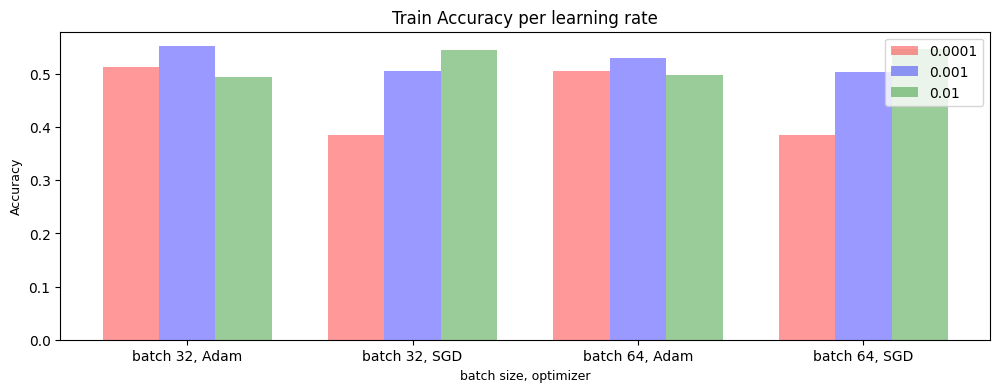

In [ ]:
### Difference of <Learning Rate> ###
# classes = ['batch_size ','optimizer', 'car', 'pedestrian', 'bicyclist', 'truck', 'light', 'pothole']
color = ['red', 'green', 'blue']

fig, ax = plt.subplots(figsize=(12,4))
bar_width = 0.25

# batch size 32 + Adam | batch size 32 + SGD | batch size 64 + Adam | batch size 64 + SGD
index = np.arange(4)

# The process of sequentially representing three accuracy bars for each model. Each graph is drawn at intervals of 0.25
b1 = plt.bar(index - bar_width, df_0001['mAP50'], bar_width, alpha=0.4, color='red', label='0.0001')
b2 = plt.bar(index, df_001['mAP50'], bar_width, alpha=0.4, color='blue', label='0.001')
b3 = plt.bar(index + bar_width, df_01['mAP50'], bar_width, alpha=0.4, color='green', label='0.01')
ax.set_xticks([0, 1, 2, 3],labels = ['batch 32, Adam', 'batch 32, SGD', 'batch 64, Adam', 'batch 64, SGD'])

plt.xlabel('batch size, optimizer', size = 9)
plt.ylabel('Accuracy', size = 9)
plt.legend()
plt.title('Train Accuracy per learning rate')
plt.show()

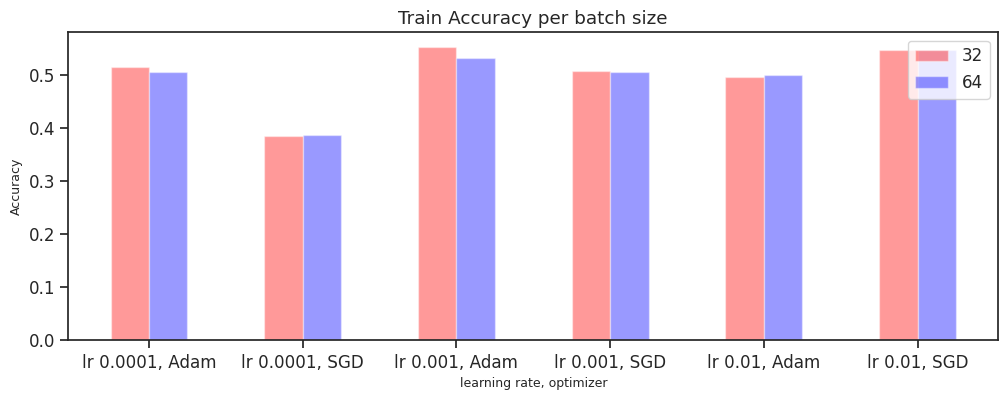

In [ ]:
### Difference of <Batch Size> ###
fig, ax = plt.subplots(figsize=(12,4))
bar_width = 0.25

# learning rate 0.0001 + Adam | learning rate 0.0001 + SGD | learning rate 0.001 + Adam | learning rate 0.001 + SGD | learning rate 0.01 + Adam | learning rate 0.01 + SGD
index = np.arange(6)

# The process of sequentially representing two accuracy bars for each model. Each graph is drawn at intervals of 0.25
b1 = plt.bar(index - bar_width/2, df_32['mAP50'], bar_width, alpha=0.4, color='red', label='32')
b2 = plt.bar(index + bar_width/2, df_64['mAP50'], bar_width, alpha=0.4, color='blue', label='64')
ax.set_xticks([0, 1, 2, 3, 4, 5],labels = ['lr 0.0001, Adam', 'lr 0.0001, SGD', 'lr 0.001, Adam', 'lr 0.001, SGD', 'lr 0.01, Adam', 'lr 0.01, SGD'])

plt.xlabel('learning rate, optimizer', size = 9)
plt.ylabel('Accuracy', size = 9)
plt.legend(loc = "upper right")
plt.title('Train Accuracy per batch size')
plt.show()

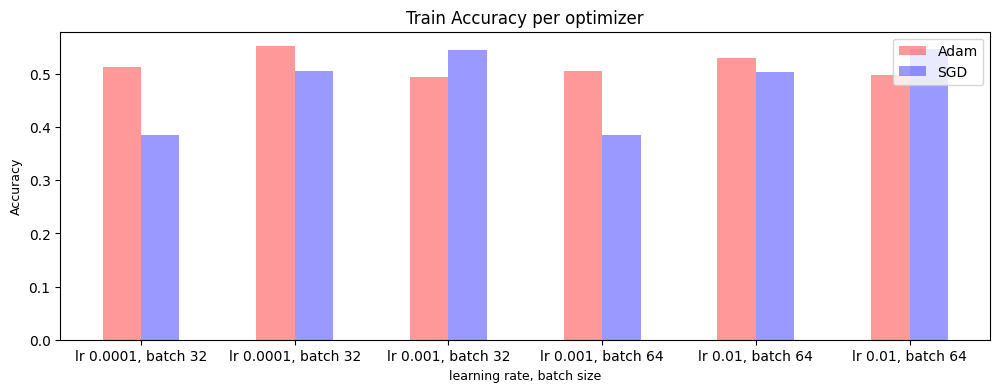

In [ ]:
### Difference of <Optimizer> ###
fig, ax = plt.subplots(figsize=(12,4))
bar_width = 0.25

# learning rate 0.0001 + batch size 32 | learning rate 0.0001 + batch size 64 | learning rate 0.001 + batch size 32 | learning rate 0.001 + batch size 64 | learning rate 0.01 + batch size 32 | learning rate 0.01 + batch size 64
index = np.arange(6)

# The process of sequentially representing two accuracy bars for each model. Each graph is drawn at intervals of 0.25
b1 = plt.bar(index - bar_width/2, df_Adam['mAP50'], bar_width, alpha=0.4, color='red', label='Adam')
b2 = plt.bar(index + bar_width/2, df_SGD['mAP50'], bar_width, alpha=0.4, color='blue', label='SGD')
ax.set_xticks([0, 1, 2, 3, 4, 5],labels = ['lr 0.0001, batch 32', 'lr 0.0001, batch 32', 'lr 0.001, batch 32', 'lr 0.001, batch 64', 'lr 0.01, batch 64', 'lr 0.01, batch 64'])

plt.xlabel('learning rate, batch size', size = 9)
plt.ylabel('Accuracy', size = 9)
plt.legend(loc = "upper right")
plt.title('Train Accuracy per optimizer')
plt.show()

## Check Difference of YOLO v8 versions

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/reduce_results.csv')
df.columns

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

In [ ]:
df_prev = pd.read_csv('/content/final_model/train/results.csv')
df_prev.columns

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

In [ ]:
# version 0 (initial version)
df_map = pd.read_csv('/content/mAP.csv')
print(df_map.columns)
df_map_before = df_map[df_map['version'] == 0]
df_map_before = df_map_before.drop(['Images', 'Instance', 'version'], axis = 1)
df_map_before.head()

Index(['Id', 'Class', 'Images', 'Instance', 'mAP50', 'version'], dtype='object')


Id       Class  mAP50
0   1         all  0.629
1   2         car  0.849
2   3       truck  0.706
3   4  pedestrian  0.561
4   5   bicyclist  0.518

In [ ]:
# version 1 (car reduction version)
df_map_after = df_map[df_map['version'] == 1]
df_map_after = df_map_after.drop(['Images', 'Instance', 'version'], axis = 1)
df_map_after.head()

Id       Class  mAP50
7    8         all  0.632
8    9         car  0.830
9   10       truck  0.734
10  11  pedestrian  0.564
11  12   bicyclist  0.511

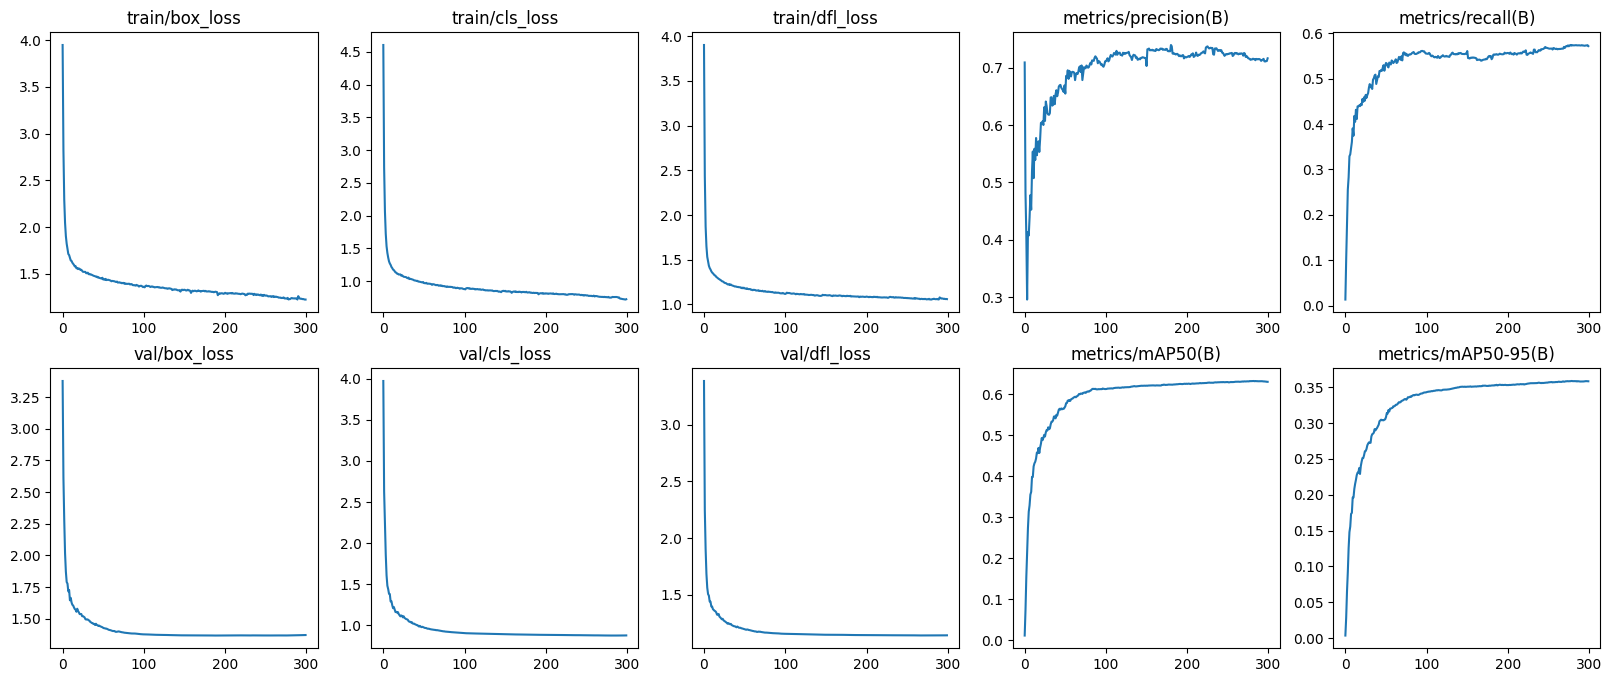

In [ ]:
# summarize history of model car reduction version
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

ax[0, 0].plot(df['         train/box_loss'])
ax[0, 0].title.set_text('train/box_loss')

ax[0, 1].plot(df['         train/cls_loss'])
ax[0, 1].title.set_text('train/cls_loss')

ax[0, 2].plot(df['         train/dfl_loss'])
ax[0, 2].title.set_text('train/dfl_loss')

ax[0, 3].plot(df['   metrics/precision(B)'])
ax[0, 3].title.set_text('metrics/precision(B)')

ax[0, 4].plot(df['      metrics/recall(B)'])
ax[0, 4].title.set_text('metrics/recall(B)')

ax[1, 0].plot(df['           val/box_loss'])
ax[1, 0].title.set_text('val/box_loss')

ax[1, 1].plot(df['           val/cls_loss'])
ax[1, 1].title.set_text('val/cls_loss')

ax[1, 2].plot(df['           val/dfl_loss'])
ax[1, 2].title.set_text('val/dfl_loss')

ax[1, 3].plot(df['       metrics/mAP50(B)'])
ax[1, 3].title.set_text('metrics/mAP50(B)')

ax[1, 4].plot(df['    metrics/mAP50-95(B)'])
ax[1, 4].title.set_text('metrics/mAP50-95(B)')

plt.show()

Comparison between version 0(initial) and version 1(car reduction) models

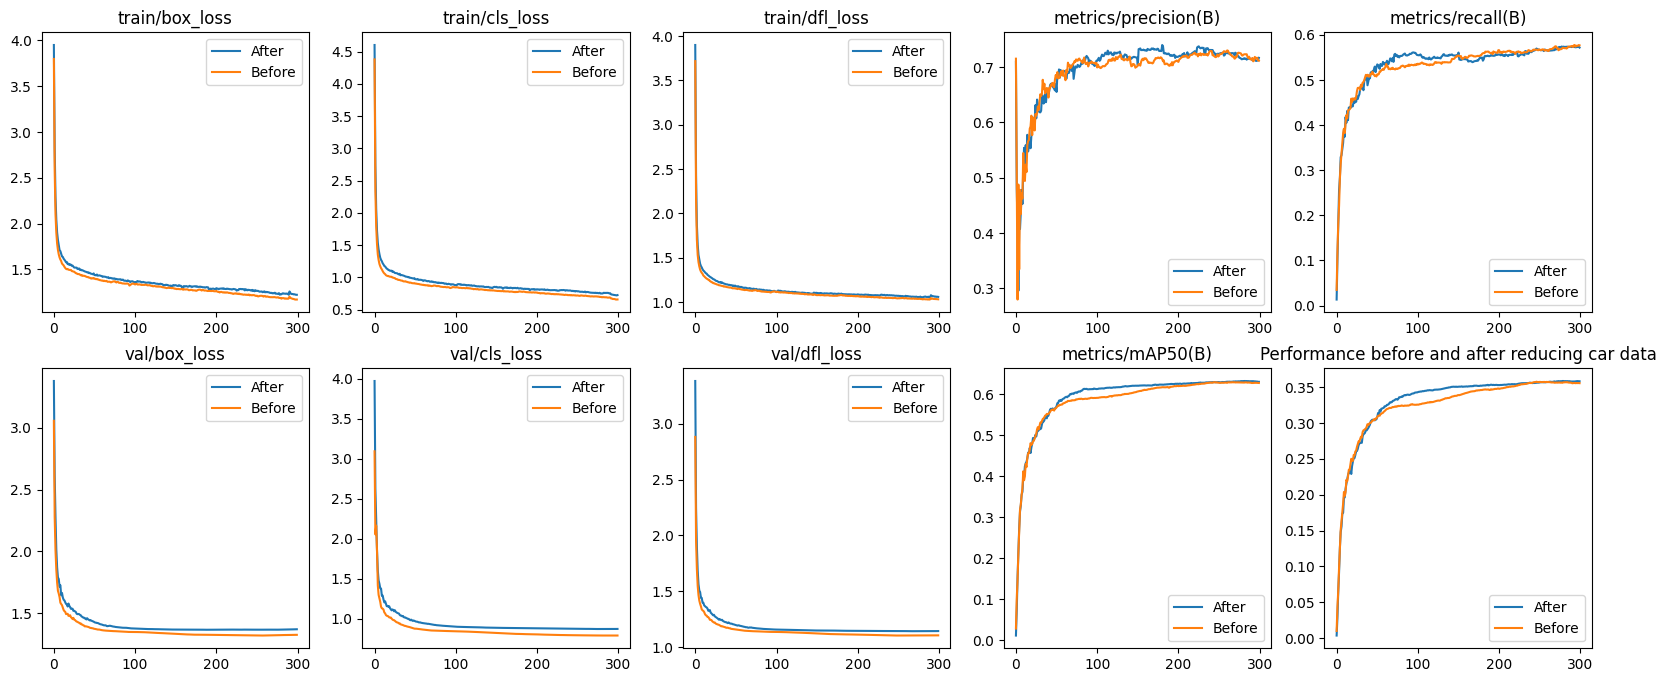

In [ ]:
# History of two models
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

ax[0, 0].plot(df['         train/box_loss'])
ax[0, 0].plot(df_prev['         train/box_loss'])
ax[0, 0].title.set_text('train/box_loss')
ax[0, 0].legend(['After', 'Before'], loc = "upper right")

ax[0, 1].plot(df['         train/cls_loss'])
ax[0, 1].plot(df_prev['         train/cls_loss'])
ax[0, 1].title.set_text('train/cls_loss')
ax[0, 1].legend(['After', 'Before'], loc = "upper right")

ax[0, 2].plot(df['         train/dfl_loss'])
ax[0, 2].plot(df_prev['         train/dfl_loss'])
ax[0, 2].title.set_text('train/dfl_loss')
ax[0, 2].legend(['After', 'Before'], loc = "upper right")

ax[0, 3].plot(df['   metrics/precision(B)'])
ax[0, 3].plot(df_prev['   metrics/precision(B)'])
ax[0, 3].title.set_text('metrics/precision(B)')
ax[0, 3].legend(['After', 'Before'], loc = "lower right")

ax[0, 4].plot(df['      metrics/recall(B)'])
ax[0, 4].plot(df_prev['      metrics/recall(B)'])
ax[0, 4].title.set_text('metrics/recall(B)')
ax[0, 4].legend(['After', 'Before'], loc = "lower right")

ax[1, 0].plot(df['           val/box_loss'])
ax[1, 0].plot(df_prev['           val/box_loss'])
ax[1, 0].title.set_text('val/box_loss')
ax[1, 0].legend(['After', 'Before'], loc = "upper right")

ax[1, 1].plot(df['           val/cls_loss'])
ax[1, 1].plot(df_prev['           val/cls_loss'])
ax[1, 1].title.set_text('val/cls_loss')
ax[1, 1].legend(['After', 'Before'], loc = "upper right")

ax[1, 2].plot(df['           val/dfl_loss'])
ax[1, 2].plot(df_prev['           val/dfl_loss'])
ax[1, 2].title.set_text('val/dfl_loss')
ax[1, 2].legend(['After', 'Before'], loc = "upper right")

ax[1, 3].plot(df['       metrics/mAP50(B)'])
ax[1, 3].plot(df_prev['       metrics/mAP50(B)'])
ax[1, 3].title.set_text('metrics/mAP50(B)')
ax[1, 3].legend(['After', 'Before'], loc = "lower right")

ax[1, 4].plot(df['    metrics/mAP50-95(B)'])
ax[1, 4].plot(df_prev['    metrics/mAP50-95(B)'])
ax[1, 4].title.set_text('metrics/mAP50-95(B)')
ax[1, 4].legend(['After', 'Before'], loc = "lower right")

plt.subtitle('Performance before and after reducing car data')
plt.show()

<ipython-input-54-7a8030b01930>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classes)


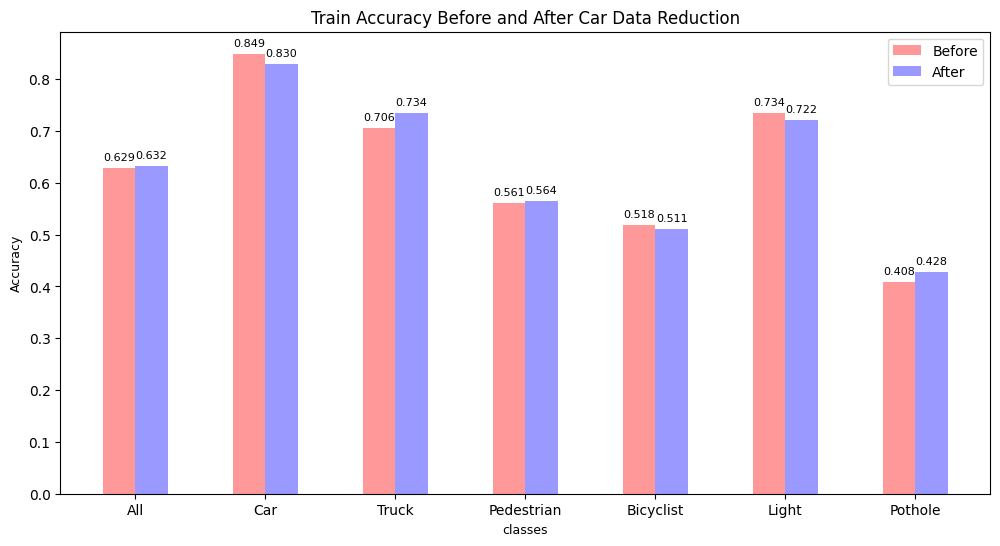

In [ ]:
# Differences in accuracy for each class between the two models
classes = [' ','All', 'Car', 'Truck', 'Pedestrian', 'Bicyclist', 'Light', 'Pothole']
color = ['red', 'green', 'blue']

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# Number of Classes is 7
index = np.arange(7)

# The process of sequentially representing two accuracy bars for each model. Each graph is drawn at intervals of 0.25
ax.set_xticklabels(classes)
b1 = plt.bar(index - bar_width/2, df_map_before['mAP50'], bar_width, alpha=0.4, color='red', label='Before')
b2 = plt.bar(index + bar_width/2, df_map_after['mAP50'], bar_width, alpha=0.4, color='blue', label='After')

for rect1,rect2 in zip(b1,b2):
    height = rect1.get_height()
    plt.text(rect1.get_x() + rect1.get_width()/2.0, height + 0.03, '%.3f' % (height), ha='center', va='top', size = 8)

for rect in b2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height + 0.03, '%.3f' % height, ha='center', va='top', size = 8)

plt.xlabel('classes', size = 9)
plt.ylabel('Accuracy', size = 9)
plt.legend()
plt.title('Train Accuracy Before and After Car Data Reduction')
plt.show()

 Comparison between version 1(car reduction) and version 2(hyperparameter tuned) models

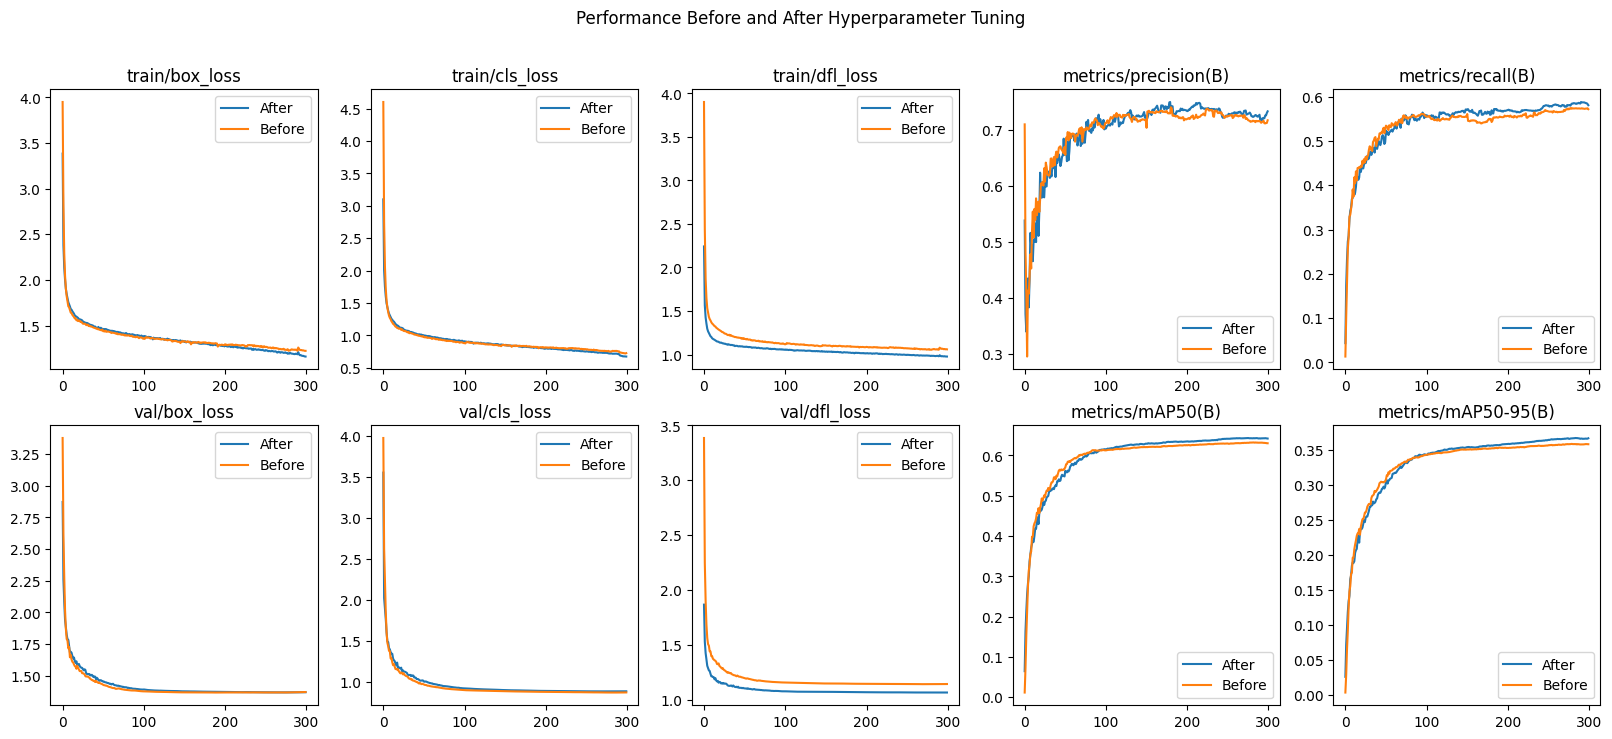

In [ ]:
df = pd.read_csv('/content/final_model_reducecar_optparam/train/results.csv')
df_prev = pd.read_csv('/content/reduce_results.csv')

# summarize history for accuracy
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

ax[0, 0].plot(df['         train/box_loss'])
ax[0, 0].plot(df_prev['         train/box_loss'])
ax[0, 0].title.set_text('train/box_loss')
ax[0, 0].legend(['After', 'Before'], loc = "upper right")

ax[0, 1].plot(df['         train/cls_loss'])
ax[0, 1].plot(df_prev['         train/cls_loss'])
ax[0, 1].title.set_text('train/cls_loss')
ax[0, 1].legend(['After', 'Before'], loc = "upper right")

ax[0, 2].plot(df['         train/dfl_loss'])
ax[0, 2].plot(df_prev['         train/dfl_loss'])
ax[0, 2].title.set_text('train/dfl_loss')
ax[0, 2].legend(['After', 'Before'], loc = "upper right")

ax[0, 3].plot(df['   metrics/precision(B)'])
ax[0, 3].plot(df_prev['   metrics/precision(B)'])
ax[0, 3].title.set_text('metrics/precision(B)')
ax[0, 3].legend(['After', 'Before'], loc = "lower right")

ax[0, 4].plot(df['      metrics/recall(B)'])
ax[0, 4].plot(df_prev['      metrics/recall(B)'])
ax[0, 4].title.set_text('metrics/recall(B)')
ax[0, 4].legend(['After', 'Before'], loc = "lower right")

ax[1, 0].plot(df['           val/box_loss'])
ax[1, 0].plot(df_prev['           val/box_loss'])
ax[1, 0].title.set_text('val/box_loss')
ax[1, 0].legend(['After', 'Before'], loc = "upper right")

ax[1, 1].plot(df['           val/cls_loss'])
ax[1, 1].plot(df_prev['           val/cls_loss'])
ax[1, 1].title.set_text('val/cls_loss')
ax[1, 1].legend(['After', 'Before'], loc = "upper right")

ax[1, 2].plot(df['           val/dfl_loss'])
ax[1, 2].plot(df_prev['           val/dfl_loss'])
ax[1, 2].title.set_text('val/dfl_loss')
ax[1, 2].legend(['After', 'Before'], loc = "upper right")

ax[1, 3].plot(df['       metrics/mAP50(B)'])
ax[1, 3].plot(df_prev['       metrics/mAP50(B)'])
ax[1, 3].title.set_text('metrics/mAP50(B)')
ax[1, 3].legend(['After', 'Before'], loc = "lower right")

ax[1, 4].plot(df['    metrics/mAP50-95(B)'])
ax[1, 4].plot(df_prev['    metrics/mAP50-95(B)'])
ax[1, 4].title.set_text('metrics/mAP50-95(B)')
ax[1, 4].legend(['After', 'Before'], loc = "lower right")

plt.suptitle('Performance Before and After Hyperparameter Tuning')
plt.show()

<ipython-input-53-52d937e77911>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classes)


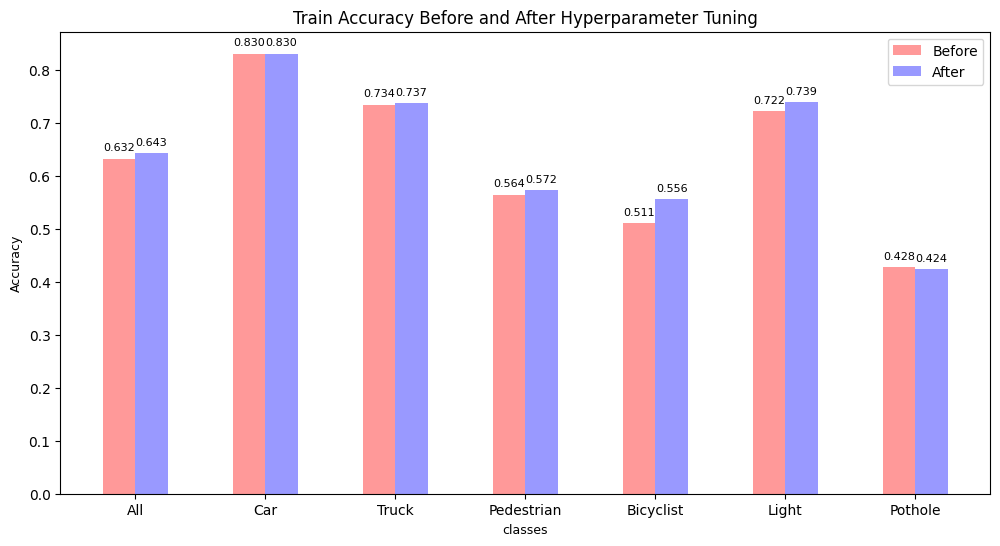

In [ ]:
# Differences in accuracy for each class between the two models
classes = ['None','All', 'Car', 'Truck', 'Pedestrian', 'Bicyclist', 'Light', 'Pothole']
optim_map = [0.643, 0.83, 0.737, 0.572, 0.556, 0.739, 0.424]
prev_map = [0.632, 0.83, 0.734, 0.564, 0.511, 0.722, 0.428]
color = ['red', 'green', 'blue']

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# Number of Classes is 7
index = np.arange(7)

# The process of sequentially representing two accuracy bars for each model. Each graph is drawn at intervals of 0.25
ax.set_xticklabels(classes)
b1 = plt.bar(index - bar_width/2, prev_map, bar_width, alpha=0.4, color='red', label='Before')
b2 = plt.bar(index + bar_width/2, optim_map, bar_width, alpha=0.4, color='blue', label='After')

for rect1,rect2 in zip(b1,b2):
    height = rect1.get_height()
    plt.text(rect1.get_x() + rect1.get_width()/2.0, height + 0.03, '%.3f' % (height), ha='center', va='top', size = 8)

for rect in b2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height + 0.03, '%.3f' % height, ha='center', va='top', size = 8)

plt.xlabel('classes', size = 9)
plt.ylabel('Accuracy', size = 9)
plt.legend()
plt.title('Train Accuracy Before and After Hyperparameter Tuning')
plt.show()

# Anything Else

In [ ]:
# v8.0
!gdown https://drive.google.com/uc?id=10VtxgpenYHgShULRUAt40LirM__tc4JZ
# v8.1
!gdown https://drive.google.com/uc?id=1rlDFnYgzLtDNS_tqJDE0-LfURDUtXwsn
!unzip mini.zip -d /content/before

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/before/content/splited_data/test/labels/Japan_009765.txt  
  inflating: /content/before/content/splited_data/test/labels/1478020224197266285.txt  
  inflating: /content/before/content/splited_data/test/labels/1479502638233407301.txt  
  inflating: /content/before/content/splited_data/test/labels/1479499164017735020.txt  
  inflating: /content/before/content/splited_data/test/labels/1479500167066538259.txt  
  inflating: /content/before/content/splited_data/test/labels/1478898104651389744.txt  
  inflating: /content/before/content/splited_data/test/labels/G0040979.txt  
  inflating: /content/before/content/splited_data/test/labels/1479505034415087476.txt  
  inflating: /content/before/content/splited_data/test/labels/1478897509938952500.txt  
  inflating: /content/before/content/splited_data/test/labels/1478020606709314980.txt  
  inflating: /content/before/content/splited_data/test/labels/1478732146614079323.txt  
  inflating: /

In [ ]:
!unzip /content/car_reduced.zip -d /content/after

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/after/content/splited_data/train/labels/G0054294.txt  
  inflating: /content/after/content/splited_data/train/labels/India_006845.txt  
  inflating: /content/after/content/splited_data/train/labels/1479503781330789717.txt  
  inflating: /content/after/content/splited_data/train/labels/1478732107043922064.txt  
  inflating: /content/after/content/splited_data/train/labels/1478899606000926548.txt  
  inflating: /content/after/content/splited_data/train/labels/1479499522021880487.txt  
  inflating: /content/after/content/splited_data/train/labels/1479500611619130713.txt  
  inflating: /content/after/content/splited_data/train/labels/1478899999620519617.txt  
  inflating: /content/after/content/splited_data/train/labels/1478897156310427328.txt  
  inflating: /content/after/content/splited_data/train/labels/img-822_jpg.rf.7582e5a13b5cf440ae9397e311ee440f.txt  
  inflating: /content/after/content/splited_data/train/labels/img-855_jpg.

In [ ]:
model = YOLO('/content/content/drive/MyDrive/LGInternship/_imgsz_192/train/weights/best.pt')
model.predict('/content/drive/MyDrive/LGInternship/5.jpg', save=True, imgsz=192, conf=0.5)


image 1/1 /content/drive/MyDrive/LGInternship/5.jpg: 160x192 5 cars, 9.1ms
Speed: 0.6ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 160, 192)
Results saved to runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'car', 1: 'truck', 2: 'pedestrian', 3: 'bicyclist', 4: 'light', 5: 'pothole'}
 orig_img: array([[[ 75, 100,  86],
         [ 80, 105,  91],
         [ 85, 110,  96],
         ...,
         [ 12,  12,  12],
         [ 14,  14,  14],
         [ 15,  15,  15]],
 
        [[ 88, 113,  99],
         [ 91, 116, 102],
         [ 92, 117, 103],
         ...,
         [  4,   4,   4],
         [  6,   6,   6],
         [  7,   7,   7]],
 
        [[ 89, 114, 100],
         [ 90, 115, 101],
         [ 89, 114, 100],
         ...,
         [  1,   1,   1],
         [  3,   3,   3],
         [  4,   4,   4]],
 
        ...,
 
        [[  9,  18,  21],
         [  8,  17,  20],
         [  6,  15,  18],
         ...,
         [ 50,  55,  54],
         [ 34,  39,  38],
         [ 48,  53,  52]],
 
        [[  9,  18,  21],
         [

In [ ]:
model.predict('/content/drive/MyDrive/LGInternship/5.jpg', save=True, imgsz=640, conf=0.5)


image 1/1 /content/drive/MyDrive/LGInternship/5.jpg: 480x640 3 cars, 1 truck, 3 potholes, 136.2ms
Speed: 6.6ms preprocess, 136.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'car', 1: 'truck', 2: 'pedestrian', 3: 'bicyclist', 4: 'light', 5: 'pothole'}
 orig_img: array([[[ 75, 100,  86],
         [ 80, 105,  91],
         [ 85, 110,  96],
         ...,
         [ 12,  12,  12],
         [ 14,  14,  14],
         [ 15,  15,  15]],
 
        [[ 88, 113,  99],
         [ 91, 116, 102],
         [ 92, 117, 103],
         ...,
         [  4,   4,   4],
         [  6,   6,   6],
         [  7,   7,   7]],
 
        [[ 89, 114, 100],
         [ 90, 115, 101],
         [ 89, 114, 100],
         ...,
         [  1,   1,   1],
         [  3,   3,   3],
         [  4,   4,   4]],
 
        ...,
 
        [[  9,  18,  21],
         [  8,  17,  20],
         [  6,  15,  18],
         ...,
         [ 50,  55,  54],
         [ 34,  39,  38],
         [ 48,  53,  52]],
 
        [[  9,  18,  21],
         [

In [ ]:
model.predict('/content/drive/MyDrive/LGInternship/5.jpg', save=True, imgsz=416, conf=0.5)


image 1/1 /content/drive/MyDrive/LGInternship/5.jpg: 320x416 4 cars, 1 truck, 2 potholes, 76.5ms
Speed: 1.6ms preprocess, 76.5ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 416)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'car', 1: 'truck', 2: 'pedestrian', 3: 'bicyclist', 4: 'light', 5: 'pothole'}
 orig_img: array([[[ 75, 100,  86],
         [ 80, 105,  91],
         [ 85, 110,  96],
         ...,
         [ 12,  12,  12],
         [ 14,  14,  14],
         [ 15,  15,  15]],
 
        [[ 88, 113,  99],
         [ 91, 116, 102],
         [ 92, 117, 103],
         ...,
         [  4,   4,   4],
         [  6,   6,   6],
         [  7,   7,   7]],
 
        [[ 89, 114, 100],
         [ 90, 115, 101],
         [ 89, 114, 100],
         ...,
         [  1,   1,   1],
         [  3,   3,   3],
         [  4,   4,   4]],
 
        ...,
 
        [[  9,  18,  21],
         [  8,  17,  20],
         [  6,  15,  18],
         ...,
         [ 50,  55,  54],
         [ 34,  39,  38],
         [ 48,  53,  52]],
 
        [[  9,  18,  21],
         [

In [ ]:
!gdown https://drive.google.com/uc?id=1tjSLR1uIhnSYOutb8ngVTyk2wkv4PzKQ
!unzip /content/final_model.zip -d /content
!gdown https://drive.google.com/uc?id=1ixo4vZ94HQU4v-9O0FRbmEXrCqbDYzdd
!unzip /content/final_model_reducecar.zip -d /content

Downloading...
From: https://drive.google.com/uc?id=1tjSLR1uIhnSYOutb8ngVTyk2wkv4PzKQ
To: /content/final_model.zip
100% 27.7M/27.7M [00:00<00:00, 33.9MB/s]
Archive:  /content/final_model.zip
  inflating: /content/final_model/train/val_batch2_labels.jpg  
  inflating: /content/final_model/train/val_batch0_pred.jpg  
  inflating: /content/final_model/train/confusion_matrix_normalized.png  
  inflating: /content/final_model/train/val_batch2_pred.jpg  
  inflating: /content/final_model/train/P_curve.png  
  inflating: /content/final_model/train/labels.jpg  
  inflating: /content/final_model/train/confusion_matrix.png  
  inflating: /content/final_model/train/args.yaml  
  inflating: /content/final_model/train/train_batch68152.jpg  
  inflating: /content/final_model/train/val_batch0_labels.jpg  
  inflating: /content/final_model/train/results.png  
  inflating: /content/final_model/train/train_batch68151.jpg  
  inflating: /content/final_model/train/PR_curve.png  
  inflating: /content/fina

In [ ]:
model = YOLO('/content/final_model/train/weights/best.pt')
metrics_before = model.val()  # no arguments needed, dataset and settings remembered
metrics_before.box.map    # map50-95
metrics_before.box.map50  # map50
metrics_before.box.map75  # map75
metrics_before.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients
val: Scanning /content/after/content/splited_data/valid/labels.cache... 2093 images, 0 backgrounds, 2 corrupt: 100%|██████████| 2093/2093 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478731922955810314.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478732688555973177.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478898184631601686.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064103.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064412.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064426.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /con

array([    0.54821,     0.48507,     0.27417,      0.2749,     0.37517,     0.20528])

In [ ]:
model = YOLO('/content/final_model_reducecar/train2/weights/best.pt')
metrics_after = model.val()  # no arguments needed, dataset and settings remembered
metrics_after.box.map    # map50-95
metrics_after.box.map50  # map50
metrics_after.box.map75  # map75
metrics_after.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients
val: Scanning /content/after/content/splited_data/valid/labels.cache... 2093 images, 0 backgrounds, 2 corrupt: 100%|██████████| 2093/2093 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478731922955810314.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478732688555973177.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478898184631601686.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064103.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064412.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064426.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /con

array([    0.53595,     0.48688,     0.26945,     0.28138,     0.36535,     0.21321])

In [ ]:
model = YOLO('/content/final_model_reducecar_optparam/train/weights/best.pt')
metrics_optim = model.val()  # no arguments needed, dataset and settings remembered
metrics_optim.box.map    # map50-95
metrics_optim.box.map50  # map50
metrics_optim.box.map75  # map75
metrics_optim.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients
val: Scanning /content/after/content/splited_data/valid/labels.cache... 2093 images, 0 backgrounds, 2 corrupt: 100%|██████████| 2093/2093 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478731922955810314.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478732688555973177.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478898184631601686.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064103.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064412.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064426.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /con

array([    0.53559,     0.49261,     0.27489,     0.30254,     0.37743,     0.21609])

In [ ]:
  import locale
locale.getpreferredencoding = lambda: "UTF-8"
!gdown https://drive.google.com/uc?id=1-1SPDb3eh5AM5upZ90Y_8V7b1tm454yM

Downloading...
From: https://drive.google.com/uc?id=1-1SPDb3eh5AM5upZ90Y_8V7b1tm454yM
To: /content/best.pt
100% 24.5M/24.5M [00:00<00:00, 24.8MB/s]


In [ ]:
model = YOLO('/content/best.pt')
metrics = model.val(plots = True)  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients
val: Scanning /content/splited_data/valid/labels.cache... 909 images, 0 backgrounds, 0 corrupt: 100%|██████████| 909/909 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/splited_data/valid/images/G0064441.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/splited_data/valid/images/G0064556.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/splited_data/valid/images/G0064823.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/splited_data/valid/images/G0307782.jpg: 2 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 57/57 [00:20<00:00,  2.73it/s]
                   all        909       5869      0.696      0.524       0.58      0.321
                   car        909       4021      0.819      0.787      0.844      0.541
                 truck

array([     0.5406,     0.42672,      0.2635,     0.19188,     0.34323,     0.16028])

In [ ]:
model = YOLO('/content/drive/MyDrive/LGInternship/final_model/train/weights/best.pt')
source = '/content/drive/MyDrive/LGInternship/test/Train2.mp4'
model.predict(source, save=True, imgsz=640, conf=0.5)



    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/74124) /content/drive/MyDrive/LGInternship/test/Train2.mp4: 384x640 7 cars, 87.6ms
video 1/1 (2/74124) /content/drive/MyDrive/LGInternship/test/Train2.mp4: 384x640 7 cars, 8.9ms
video 1/1 (3/74124) /content/drive/MyDrive/LGInternship/test/Train2.mp4: 384x640 7 cars, 8.4ms
video 1/1 (4/74124) /content/drive/MyDrive/LGInternship/test/Train2.mp4: 384x640 7 cars, 7.2ms
video 1/1 (5/74124) /content/drive/MyDrive/LGInternship/test/Train2.mp4: 384x6

KeyboardInterrupt: ignored

In [ ]:
model = YOLO('/content/drive/MyDrive/LGInternship/final_model_reducecar/train2/weights/best.pt')
source = '/content/drive/MyDrive/LGInternship/test/pothole_test2.mp4'
model.predict(source, save=True, imgsz=640, conf=0.5)



    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/1433) /content/drive/MyDrive/LGInternship/test/pothole_test2.mp4: 384x640 7 cars, 85.4ms
video 1/1 (2/1433) /content/drive/MyDrive/LGInternship/test/pothole_test2.mp4: 384x640 7 cars, 7.1ms
video 1/1 (3/1433) /content/drive/MyDrive/LGInternship/test/pothole_test2.mp4: 384x640 7 cars, 6.3ms
video 1/1 (4/1433) /content/drive/MyDrive/LGInternship/test/pothole_test2.mp4: 384x640 7 cars, 8.9ms
video 1/1 (5/1433) /content/drive/MyDrive/LGInternship

In [ ]:
!gdown https://drive.google.com/uc?id=1jXLRCiCc_egMk3NpAiAiBYtdM4Pg0dBG

Downloading...
From: https://drive.google.com/uc?id=1jXLRCiCc_egMk3NpAiAiBYtdM4Pg0dBG
To: /content/final_model_reducecar.zip
100% 21.8M/21.8M [00:00<00:00, 34.4MB/s]


In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics.utils.plots
plot_results('/content/results.csv')

ModuleNotFoundError: ignored

In [ ]:
!gdown https://drive.google.com/uc?id=10VtxgpenYHgShULRUAt40LirM__tc4JZ

!gdown https://drive.google.com/uc?id=1rlDFnYgzLtDNS_tqJDE0-LfURDUtXwsn


Downloading...
From: https://drive.google.com/uc?id=10VtxgpenYHgShULRUAt40LirM__tc4JZ
To: /content/mini.zip
100% 1.97G/1.97G [00:28<00:00, 68.3MB/s]
/bin/bash: line 1: upzip: command not found
Downloading...
From: https://drive.google.com/uc?id=1rlDFnYgzLtDNS_tqJDE0-LfURDUtXwsn
To: /content/car_reduced.zip
100% 1.77G/1.77G [00:21<00:00, 81.1MB/s]
/bin/bash: line 1: upzip: command not found


In [ ]:
!unzip mini.zip -d /content/before
!unzip car_reduced.zip -d /content/after

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/after/content/splited_data/train/images/1478899520878165811.jpg  
  inflating: /content/after/content/splited_data/train/images/G0027311.jpg  
  inflating: /content/after/content/splited_data/train/images/1478898196057306312.jpg  
  inflating: /content/after/content/splited_data/train/images/1479503111786027298.jpg  
  inflating: /content/after/content/splited_data/train/images/G0028271.jpg  
  inflating: /content/after/content/splited_data/train/images/1479499695054558070.jpg  
  inflating: /content/after/content/splited_data/train/images/1479505639958024090.jpg  
  inflating: /content/after/content/splited_data/train/images/1479505605454220096.jpg  
  inflating: /content/after/content/splited_data/train/images/Japan_001537.jpg  
  inflating: /content/after/content/splited_data/train/images/1479503993847070548.jpg  
  inflating: /content/after/content/splited_data/train/images/1479502706247335515.jpg  
  inflating: /content/aft

In [ ]:
model = YOLO('/content/best.pt')
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.confusion_matrix
metrics.confusion_matrix.tp_fp()

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients
val: Scanning /content/splited_data/valid/labels.cache... 909 images, 0 backgrounds, 0 corrupt: 100%|██████████| 909/909 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/splited_data/valid/images/G0064441.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/splited_data/valid/images/G0064556.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/splited_data/valid/images/G0064823.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/splited_data/valid/images/G0307782.jpg: 2 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 57/57 [00:19<00:00,  2.98it/s]
                   all        909       5869      0.706      0.552      0.612      0.348
                   car        909       4021      0.853      0.753      0.838      0.535
                 truck

(array([       3128,         138,         272,          19,         327,         228]),
 array([        683,          78,         145,          21,          68,         212]))

In [ ]:
metrics.confusion_matrix.tp_fp()

(array([       3128,         138,         272,          19,         327,         228]),
 array([        683,          78,         145,          21,          68,         212]))

In [ ]:
model2 = YOLO('/content/best.pt')
metrics2 = model.val()  # no arguments needed, dataset and settings remembered

In [ ]:
metrics_before.confusion_matrix.tp_fp()

(array([      10478,         476,         813,          76,        1189,         686]),
 array([       1884,         191,         402,          68,         168,         399]))

In [ ]:
metrics_after.confusion_matrix.tp_fp()

(array([       6938,         510,         861,          71,        1200,         818]),
 array([       1515,         230,         463,          70,         207,         580]))

In [ ]:
before_TPArray = metrics_before.confusion_matrix.tp_fp()[0]
before_FPArray = metrics_before.confusion_matrix.tp_fp()[1]
after_TPArray = metrics_after.confusion_matrix.tp_fp()[0]
after_FPArray = metrics_after.confusion_matrix.tp_fp()[1]
optim_TPArray = metrics_optim.confusion_matrix.tp_fp()[0]
optim_FPArray = metrics_optim.confusion_matrix.tp_fp()[1]
type(before_TPArray)

numpy.ndarray

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

classes = ['Car', 'Truck', 'Pedestrian', 'Bicylist', 'Light', 'Pothole']
before_TP = pd.DataFrame({ 'Class' : classes,
    'TP' : before_TPArray,})
before_FP = pd.DataFrame({ 'Class' : classes,
    'TP' : before_FPArray,})
after_TP = pd.DataFrame({ 'Class' : classes,
    'TP' : after_TPArray,})
after_FP = pd.DataFrame({ 'Class' : classes,
    'TP' : after_FPArray,})
optim_TP = pd.DataFrame({ 'Class' : classes,
    'TP' : optim_TPArray,})
optim_FP = pd.DataFrame({ 'Class' : classes,
    'TP' : optim_FPArray,})
before_TP

Class      TP
0         Car  6952.0
1       Truck   475.0
2  Pedestrian   813.0
3    Bicylist    76.0
4       Light  1189.0
5     Pothole   684.0

In [ ]:
v4_TP_List = [15917, 581, 2197, 99, 2424, 157]
v4_FP_List = [5660, 300, 1482, 66, 725, 74]

v4_TP = pd.DataFrame({'Class': classes, 'TP': v4_TP_List})
v4_FP = pd.DataFrame({'Class': classes, 'TP': v4_FP_List})
v4_TP

Class     TP
0         Car  15917
1       Truck    581
2  Pedestrian   2197
3    Bicylist     99
4       Light   2424
5     Pothole    157

In [ ]:
model = YOLO('/content/final_model_reducecar_optparam/train/weights/best.pt')
metrics_opt = model.val()  # no arguments needed, dataset and settings remembered
metrics_opt.box.map    # map50-95
metrics_opt.box.map50  # map50
metrics_opt.box.map75  # map75
metrics_opt.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients
val: Scanning /content/after/content/splited_data/valid/labels.cache... 2093 images, 0 backgrounds, 2 corrupt: 100%|██████████| 2093/2093 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478731922955810314.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478732688555973177.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478898184631601686.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064103.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064412.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064426.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /con

array([    0.53559,     0.49261,     0.27489,     0.30254,     0.37743,     0.21609])

In [ ]:
model = YOLO('/content/final_model_reducecar/train2/weights/best.pt')
metrics_prev = model.val()  # no arguments needed, dataset and settings remembered
metrics_prev.box.map    # map50-95
metrics_prev.box.map50  # map50
metrics_prev.box.map75  # map75
metrics_prev.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients
val: Scanning /content/after/content/splited_data/valid/labels.cache... 2093 images, 0 backgrounds, 2 corrupt: 100%|██████████| 2093/2093 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478731922955810314.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478732688555973177.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/1478898184631601686.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064103.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064412.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/after/content/splited_data/valid/images/G0064426.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /con

array([    0.53595,     0.48688,     0.26945,     0.28138,     0.36535,     0.21321])

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('best.pt')

result = model(source = '/content/drive/MyDrive/LGInternship/Demo_1.mp4', stream = True)

model.predict(result, conf = 0.5, iou = 0.5, save = True, show = False, device = 0, vid_stride = True)

TypeError: ignored

In [ ]:
result

In [ ]:
import cv2
# Open the video file
video_path = "/content/drive/MyDrive/LGInternship/Demo_1.mp4"
cap = cv2.VideoCapture(video_path)

output_path = 'output_video.mp4'

# VideoWriter 객체 생성
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 30, (int(cap.get(3)), int(cap.get(4))))

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model.predict(frame, conf = 0.5, iou = 0.5, save = True, show = False)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        # cv2.imshow("YOLOv8 Inference", annotated_frame)

        out.write(frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

0: 384x640 2 cars, 2 trucks, 1 light, 9.6ms
Speed: 3.2ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2

0: 384x640 2 cars, 1 truck, 1 light, 10.1ms
Speed: 3.1ms preprocess, 10.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2

0: 384x640 2 cars, 2 trucks, 1 light, 10.2ms
Speed: 3.1ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2

0: 384x640 2 cars, 2 trucks, 1 light, 9.5ms
Speed: 3.3ms preprocess, 9.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2

0: 384x640 1 car, 1 truck, 1 light, 9.0ms
Speed: 3.1ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2

0: 384x640 2 cars, 1 truck, 1 light, 9.8ms
Speed: 3.2ms preprocess,

In [ ]:
!cp output_video.mp4 drive/MyDrive/LGInternship/Demo_1_output.mp4